<a href="https://colab.research.google.com/github/sumalee023/ExpressWebsockets/blob/main/Facebook_Scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob
!python -m textblob.download_corpora
!pip install opencv-python
!pip install googletrans==4.0.0-rc1
#!pip install googletrans
!pip install emoji

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 255

In [ ]:
from scipy.special import lambertw
product_exp = lambda x : x * np.exp(x)

In [ ]:
import pandas as pd
import numpy as np
import os
import multiprocessing
N_THREADS = str(-1)
os.environ['OMP_NUM_THREADS'] = N_THREADS
os.environ['OPENBLAS_NUM_THREADS'] = N_THREADS
os.environ['MKL_NUM_THREADS'] = N_THREADS
os.environ['VECLIB_MAXIMUM_THREADS'] = N_THREADS
os.environ['NUMEXPR_NUM_THREADS'] = N_THREADS
print("OMP_NUM_THREADS count : "+ os.environ['OMP_NUM_THREADS'])
print("OPENBLAS_NUM_THREADS count : "+ os.environ['OPENBLAS_NUM_THREADS'] )
print("MKL_NUM_THREADS count : "+ os.environ['MKL_NUM_THREADS'] )
print("VECLIB_MAXIMUM_THREADS count : "+ os.environ['VECLIB_MAXIMUM_THREADS'])
print("NUMEXPR_NUM_THREADS count : "+ os.environ['NUMEXPR_NUM_THREADS'] )

OMP_NUM_THREADS count : -1
OPENBLAS_NUM_THREADS count : -1
MKL_NUM_THREADS count : -1
VECLIB_MAXIMUM_THREADS count : -1
NUMEXPR_NUM_THREADS count : -1


In [ ]:
from tqdm import tqdm

In [ ]:
#change your directory here
# working_directory = "/content/drive/MyDrive/Colab Notebooks/Colab Notebooks Yang/Yang_Scraped_Data/" #Other environment
working_directory = "/content/drive/MyDrive/Colab Notebooks/Yang_Scraped_Data/" #My computer

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
shop_lists = ['AdviceClub','Bananaitshop','byDotlife','CPUCore2Duo','itcityofficial','jibcomputergroup','Mcwinnerbangkapi','munkonggadget1','Powerbuythailand','siamTV','speedcom.th','topvalue']
#shop_lists = ['AdviceClub','Bananaitshop','byDotlife','CPUCore2Duo','itcityofficial','jibcomputergroup','Powerbuythailand','speedcom.th','topvalue']
#shop_lists = ['itcityofficial','Bananaitshop','Powerbuythailand','siamTV']
#shop_lists = ['itcityofficial','Bananaitshop','Powerbuythailand','siamTV','jibcomputergroup']
#shop_lists = ['siamTV']
shop_lists_len = []

In [ ]:
df = pd.read_csv(working_directory+shop_lists[0]+"/"+shop_lists[0]+"_posts.csv")
shop_lists_len.append(df.shape[0])
for i in range(1,len(shop_lists)):
    additional_df = pd.read_csv(working_directory+shop_lists[i]+"/"+shop_lists[i]+"_posts.csv")
    #df = df.append(additional_df,ignore_index=True)
    df = pd.concat([df, additional_df],ignore_index=True)
    shop_lists_len.append(additional_df.shape[0])
#image_directory = "/content/drive/MyDrive/Yang_Scraped_Data/Bananaitshop/images/"

In [ ]:
shop_lists_len

[1030, 1084, 1020, 1070, 1079, 1000, 570, 1040, 1090, 1020, 830, 960]

In [ ]:
df

,post_id,text,time,likes,comments,shares,link,images,video_thumbnail,user_id,username
0,759271756235116,🖥️ Friday Funday ส่องโปรเด็ด!! ศุกร์ได้จอ..สุข...,2023-10-19 23:41:43,0,0,0,https://www.advice.co.th/FridayFunday?fbclid=I...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub
1,759101196252172,Gaming Live is Coming แจกอีกแล้ว ฟิกเกอร์รวมเห...,2023-10-19 20:30:03,0,0,0,https://www.advice.co.th/GamingLive-Oct-Thief?...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub
2,759005902928368,✏️ Apple Pencil รุ่นไหนดี? ช้อปที่ Advice จะรุ...,2023-10-19 17:30:01,0,0,0,https://bit.ly/Pencil-2-V?fbclid=IwAR0u9jCjIk5...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub
3,758991682929790,ลดแรงส์ ในรอบปี ❗ แบงค์พัน 2 ใบมีทอน 😙\n🖨️ เคร...,2023-10-19 16:30:00,0,0,0,https://bit.ly/BROTHER-HL-1110?fbclid=IwAR1o07...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub
4,758975069598118,💙 NEW ARRIVAL !! Intel 14th Gen ใหม่ล่าสุด พร้...,2023-10-19 15:45:00,0,0,0,https://www.advice.co.th/Intel14thGen?fbclid=I...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub
...,...,...,...,...,...,...,...,...,...,...,...
11788,2719475174851320,🔥หั่นราคา ลดท้าช้อป เครื่องใช้ไฟฟ้าลดราคาสุดปั...,2022-09-27 17:20:00,0,0,0,https://shope.ee/8eqObVGvkf?fbclid=IwAR1XHUtzC...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,3.972452e+14,Topvalue
11789,2719323174866520,🎈ทำเมนูหมูกรอบทำได้ง่ายๆ แค่มี SCE Plus หม้อทอ...,2022-09-27 12:00:56,0,0,0,NaN,[],https://scontent.fcnx3-1.fna.fbcdn.net/v/t51.3...,3.972452e+14,Topvalue
11790,2718275951637909,🔥หั่นราคา ลดท้าช้อป เครื่องใช้ไฟฟ้าลดราคาสุดปั...,2022-09-27 12:00:05,0,0,0,https://bit.ly/3BDN8aw?fbclid=IwAR2XQzHZM1V4xk...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,3.972452e+14,Topvalue
11791,2719311578201013,🌞เครื่องดูดฝุ่นที่ขายดีที่สุดตอนนี้ ผมผี ผมคน ...,2022-09-27 11:40:19,0,0,0,NaN,[],https://scontent.fcnx3-1.fna.fbcdn.net/v/t51.3...,3.972452e+14,Topvalue


In [ ]:
# Export DataFrame to Excel
df.to_csv('originData.csv', index=False)

In [ ]:
df['datetime'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

# Extract the date and time components into separate columns
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# Optionally, you can drop the original datetime column if you no longer need it
# df.drop('datetime_column', axis=1, inplace=True)

# Display the DataFrame with date and time columns

In [ ]:
df.head()

,post_id,text,time,likes,comments,shares,link,images,video_thumbnail,user_id,username,datetime,date
0,759271756235116,🖥️ Friday Funday ส่องโปรเด็ด!! ศุกร์ได้จอ..สุข...,23:41:43,0,0,0,https://www.advice.co.th/FridayFunday?fbclid=I...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub,2023-10-19 23:41:43,2023-10-19
1,759101196252172,Gaming Live is Coming แจกอีกแล้ว ฟิกเกอร์รวมเห...,20:30:03,0,0,0,https://www.advice.co.th/GamingLive-Oct-Thief?...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub,2023-10-19 20:30:03,2023-10-19
2,759005902928368,✏️ Apple Pencil รุ่นไหนดี? ช้อปที่ Advice จะรุ...,17:30:01,0,0,0,https://bit.ly/Pencil-2-V?fbclid=IwAR0u9jCjIk5...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub,2023-10-19 17:30:01,2023-10-19
3,758991682929790,ลดแรงส์ ในรอบปี ❗ แบงค์พัน 2 ใบมีทอน 😙\n🖨️ เคร...,16:30:00,0,0,0,https://bit.ly/BROTHER-HL-1110?fbclid=IwAR1o07...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub,2023-10-19 16:30:00,2023-10-19
4,758975069598118,💙 NEW ARRIVAL !! Intel 14th Gen ใหม่ล่าสุด พร้...,15:45:00,0,0,0,https://www.advice.co.th/Intel14thGen?fbclid=I...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,1.000646e+14,AdviceClub,2023-10-19 15:45:00,2023-10-19


In [ ]:
# Export DataFrame to Excel
df.to_csv('2dateTimeChanged.csv', index=False)

In [ ]:
#Remove outliers where likes are zero and extreme values.
from scipy.stats import zscore
df = df[(zscore(df['likes']) <= 1.0)]
df = df.loc[(df['likes'] > 0)]


df = df.drop(columns=['post_id','comments','shares','user_id','username'])
df

,text,time,likes,link,images,video_thumbnail,datetime,date
21,NaN,19:33:30,9,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-10-17 19:33:30,2023-10-17
462,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,15:49:40,13,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-08-21 15:49:40,2023-08-21
463,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,11:56:08,26,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,2023-08-21 11:56:08,2023-08-21
464,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",11:00:00,25,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-08-20 11:00:00,2023-08-20
465,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,20:30:00,11,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-08-19 20:30:00,2023-08-19
...,...,...,...,...,...,...,...,...
11245,NaN,10:07:07,6,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,2023-06-09 10:07:07,2023-06-09
11261,NaN,13:48:11,15,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-06-02 13:48:11,2023-06-02
11357,NaN,13:43:41,1,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-04-25 13:43:41,2023-04-25
11757,NaN,08:44:54,5,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2022-10-11 08:44:54,2022-10-11


In [ ]:
df.head()

,text,time,likes,link,images,video_thumbnail,datetime,date
21,NaN,19:33:30,9,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-10-17 19:33:30,2023-10-17
462,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,15:49:40,13,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-08-21 15:49:40,2023-08-21
463,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,11:56:08,26,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,2023-08-21 11:56:08,2023-08-21
464,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",11:00:00,25,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-08-20 11:00:00,2023-08-20
465,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,20:30:00,11,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,2023-08-19 20:30:00,2023-08-19


In [ ]:
df = df[['date', 'time','datetime', 'link','images','video_thumbnail','text','likes']]
df

,date,time,datetime,link,images,video_thumbnail,text,likes
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,9
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11
...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,NaN,6
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,15
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,1
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,5


In [ ]:
# Export DataFrame to Excel
df.to_csv('3reContruct1.csv', index=False)

In [ ]:
#df.drop(df[df['likes'] == 0].index, inplace=True)
df

,date,time,datetime,link,images,video_thumbnail,text,likes
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,9
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11
...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,NaN,6
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,15
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,1
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,5


In [ ]:
# Define spike days as a list of date strings
spike_days = ['02-02', '03-03', '04-04', '05-05', '06-06', '07-07', '08-08', '09-09', '10-10', '11-11', '12-12']

# Filter DataFrame for spike days
df[df['datetime'].dt.strftime('%d-%m').isin(spike_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes
1203,2023-10-10,13:44:54,2023-10-10 13:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,10
1514,2023-09-09,20:00:01,2023-09-09 20:00:01,https://com7.co/45IrW18?fbclid=IwAR0OJhzH3HjAE...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⚡FLASH SALE คนแบบไหนก็มีสิทธิ์ค่ะ\nGalaxy Tab ...,38
1515,2023-09-09,18:00:10,2023-09-09 18:00:10,NaN,[],https://scontent.fcnx3-1.fna.fbcdn.net/v/t15.5...,เตรียมพบกับ #GoProHERO12 Black 📷 ที่สุดของคุณภ...,29
1516,2023-09-09,14:00:00,2023-09-09 14:00:00,https://com7.co/3sCIhWi?fbclid=IwAR3u-MIPKta3m...,['https://m.facebook.com/photo/view_full_size/...,NaN,❌ No คือ ไม่\n✅ ใช่ คือ iPhone 14 Series ลดสูง...,77
1517,2023-09-09,12:00:04,2023-09-09 12:00:04,https://bit.ly/45OmBFG?fbclid=IwAR2ZgtKsUVtFDe...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,โปรดี๊ดีพร้อมเสิร์ฟให้ทุกคนแล้ววววว 🥳\n💛 MacBo...,159
...,...,...,...,...,...,...,...,...
10614,2022-12-12,15:40:25,2022-12-12 15:40:25,https://bit.ly/3Brn4jN?fbclid=IwAR0fKm4zgS8ERy...,NaN,NaN,ดีลพิเศษส่งท้ายปี กับ HP PRINTER แค่ 8 วันเท่า...,9
10615,2022-12-12,13:29:04,2022-12-12 13:29:04,https://shorturl.asia/KNb3e?fbclid=IwAR2cJ3l4t...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,💥Speed computer💥 X Lazada 12.12 เซลล์ใหญ่ส่งท้...,4
10617,2022-12-12,10:57:05,2022-12-12 10:57:05,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,2
10618,2022-12-12,10:10:03,2022-12-12 10:10:03,https://bit.ly/3hfWOSy?fbclid=IwAR1dcOi1Icc_3X...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,📣สปีดคืนความสุขให้ลูกค้าคนพิเศษ ร่วมเฉลิมฉลองร...,3


In [ ]:
# Export DataFrame to Excel
df.to_csv('4spikeDay.csv', index=False)

In [ ]:
# Define midmonth days as a list of date strings
midmonth_days = ['15-01','15-02','15-03', '15-04', '15-05', '15-06', '15-07', '15-08', '15-09', '15-10', '15-11', '15-12']

# Filter DataFrame for spike days
df[df['datetime'].dt.strftime('%d-%m').isin(midmonth_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes
1151,2023-10-15,10:00:00,2023-10-15 10:00:00,https://com7.co/3PzEnFC?fbclid=IwAR0v51IjZY62A...,['https://m.facebook.com/photo/view_full_size/...,NaN,เบื่อรถติด แต่ก็อยากช้อป ใช้เลยกรอกโค้ด BNNA50...,21
1152,2023-10-15,09:00:01,2023-10-15 09:00:01,https://bit.ly/48NNE5G?fbclid=IwAR2Z5CiS1v647N...,[],https://scontent.fcnx3-1.fna.fbcdn.net/v/t15.5...,📣 ใหม่ Galaxy A05 | A05s เครื่องเร็ว ชิปเซ็ตแร...,27
1446,2023-09-15,21:23:26,2023-09-15 21:23:26,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,NaN,71
1567,2023-07-15,10:00:01,2023-07-15 10:00:01,https://bit.ly/3NQ8w2w?fbclid=IwAR3-xDhnrWf9W-...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,Redmi Note 12 สีใหม่! ความจุใหม่\nช้อปเลยที่ >...,164
1568,2023-07-15,09:00:01,2023-07-15 09:00:01,https://bit.ly/3JNspWD?fbclid=IwAR1G-bxLvLLiud...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🚫 ใบเสร็จบานาน่ามีค่า อย่าทิ้ง! 🚫\nแลกรับส่วนล...,35
...,...,...,...,...,...,...,...,...
9327,2023-09-15,00:00:01,2023-09-15 00:00:01,http://SiamTV.com/?fbclid=IwAR0LRCa7vdgiE8rPF2...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,iPhone 15 Pro Max ไทเทเนียมระดับโปร สรรค์สร้าง...,27
10515,2023-02-15,09:00:04,2023-02-15 09:00:04,https://www.lazada.co.th/mid-month?fbclid=IwAR...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,💖 Speed Computer X Lazada Mid month sale 💖\nช้...,2
10602,2022-12-15,16:22:39,2022-12-15 16:22:39,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,รับฟรี Lucky Premium ของพรีเมี่ยมสุดชิคสำหรับแ...,3
10603,2022-12-15,13:42:16,2022-12-15 13:42:16,https://intel.speedcom.co.th/evo?fbclid=IwAR3S...,NaN,NaN,6 คุณสมบัติ Intel® Evo™ มาตารฐานใหม่\nการันตีป...,7


In [ ]:
# Export DataFrame to Excel
df.to_csv('5midMonthDay.csv', index=False)

In [ ]:
# Define Payday days as a list of date strings
payday_days = ['25-01','25-02','25-03', '25-04', '25-05', '25-06', '25-07', '25-08', '25-09', '25-10', '25-11', '25-12']

# Filter DataFrame for Payday days
df[df['datetime'].dt.strftime('%d-%m').isin(payday_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes
1062,2023-10-25,21:56:42,2023-10-25 21:56:42,https://bit.ly/40bAiMF?fbclid=IwAR1xHzbkVeLOkr...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,OPPO Find N3 Series นิยามใหม่ของการพับ ✨\nยกระ...,88
1063,2023-10-25,20:35:09,2023-10-25 20:35:09,https://bit.ly/40grKnN?fbclid=IwAR0KaVU_iHLCho...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⚡ พบกับ iPhone 15 ที่ งาน BaNANA Mobile Expo 2...,33
1064,2023-10-25,20:00:01,2023-10-25 20:00:01,https://bit.ly/48YXrWx?fbclid=IwAR3t__OzHsgeVZ...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,มาเปลี่ยนเป็น Dynamic Island กับ #iPhone15 กัน...,34
1065,2023-10-25,19:14:02,2023-10-25 19:14:02,https://bit.ly/46Kyz3h?fbclid=IwAR1ppYpRPdWM87...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,ใหม่❗️ OPPO Find N3 Flip สมาร์ตโฟนจอพับที่มาพร...,85
1067,2023-10-25,17:00:03,2023-10-25 17:00:03,https://bit.ly/3Q2G8eI?fbclid=IwAR1I928iQ7m7-Z...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔌 ช้อปเครื่องใช้ไฟฟ้า BaNANA X LG ELECTRIC SAL...,17
...,...,...,...,...,...,...,...,...
10684,2022-11-25,15:17:59,2022-11-25 15:17:59,NaN,NaN,NaN,📣มาตำกันได้เลยครับบบ🔥🔥🔥\n\n📌พิกัด : ไบเทค บางน...,8
10686,2022-11-25,11:13:49,2022-11-25 11:13:49,NaN,NaN,NaN,📣4 วัน จัดเต็ม ซีพียูลดล้างสต็อก ⚡\nเฉพาะช่วงง...,7
11150,2023-07-25,17:00:08,2023-07-25 17:00:08,https://bit.ly/3ZC2cAy?fbclid=IwAR23lw99-vq9-C...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,𝗧𝗼𝗽𝘃𝗮𝗹𝘂𝗲 𝗕𝗿𝗮𝗻𝗱 𝗗𝗮𝘆 𝘅 𝗡𝗼𝗰𝗡𝗼𝗰 💙💙 สินค้าราคาดีแบร...,12
11151,2023-07-25,16:04:08,2023-07-25 16:04:08,https://www.tiktok.com/@hr_topvalue/video/7258...,[],NaN,ใครกำลังมองหาตำแหน่งงานที่ตอบโจทย์ พร้อมได้รับ...,5


In [ ]:
# Export DataFrame to Excel
df.to_csv('6payDay.csv', index=False)

In [ ]:
# Define Pre-Hype days as a list of date strings
prehype_days = ['30-01','31-01','01-02','28-02','29-02','01-03','02-03','01-04','02-04','03-04','02-05','03-05','04-05','03-06','04-06','05-06','04-07','05-07','06-07','05-08','06-08','07-08','06-09','07-09','08-09','07-10','08-10','09-10','08-11','09-11','10-11','09-12','10-12','11-12']

# Filter DataFrame for Pre-Hype days
df[df['datetime'].dt.strftime('%d-%m').isin(prehype_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes
1521,2023-09-08,21:00:01,2023-09-08 21:00:01,https://com7.co/3Z9LjNV?fbclid=IwAR28c09RTWpf8...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⚡9.9 วันช้อปแห่งปี มอนิเตอร์\nลดแรงทะลุจอ ถึงข...,17
1522,2023-09-08,20:50:00,2023-09-08 20:50:00,https://com7.co/3Z9LjNV?fbclid=IwAR0ri3lQroSyK...,['https://m.facebook.com/photo/view_full_size/...,NaN,⚡9.9 วันช้อปแห่งชาติ ลดแน่เกือบหมื่น!\nลำโพง ห...,18
1523,2023-09-08,20:30:00,2023-09-08 20:30:00,https://com7.co/3Z9LjNV?fbclid=IwAR2mGuDmkm-bp...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⚡9.9 วันช้อปแห่งชาติ ลดแน่เกือบหมื่น!\nมือถือเ...,28
1524,2023-09-08,19:59:00,2023-09-08 19:59:00,https://com7.co/3sHjJvr?fbclid=IwAR0pCQfAmf_By...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🌠 Friday Night ศุกร์ฉลอง ของลดราคา\nสินค้าไอที...,23
1525,2023-09-08,19:30:12,2023-09-08 19:30:12,https://com7.co/3rcK9Vn?fbclid=IwAR2tKWjBwlKs2...,[],NaN,"⚡ลดเกือบ 10,000.- ลดอย่างเดือด 9.9 วันช้อปแห่ง...",99
...,...,...,...,...,...,...,...,...
11134,2023-08-07,08:54:22,2023-08-07 08:54:22,https://bit.ly/3ZC2cAy?fbclid=IwAR1SzcyTzt5Gal...,['https://m.facebook.com/photo/view_full_size/...,NaN,𝗡𝗼𝗰𝗻𝗼𝗰 𝘅 𝗧𝗼𝗽𝘃𝗮𝗹𝘂𝗲 𝟴.𝟴 𝗦𝘂𝗽𝗲𝗿 𝗦𝗮𝗹𝗲 ลดสนั่น ช้อปส...,2
11135,2023-08-05,15:37:00,2023-08-05 15:37:00,https://bit.ly/47ciqV0?fbclid=IwAR2NYkoe3tyeBo...,['https://m.facebook.com/photo/view_full_size/...,NaN,❤️ เปิดโพย 𝐬𝐡𝐨𝐩𝐞𝐞 โค้ดเด็ดจัดหนัก 𝟴 .𝟴 นี้\n📦ว...,10
11136,2023-08-05,15:10:46,2023-08-05 15:10:46,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⏰ ทักแชทด่วน !! ⚡️𝟴.𝟴 นี้ ลดแรงสูงสุด 𝟵𝟬 % ลดแ...,10
11137,2023-08-05,11:55:21,2023-08-05 11:55:21,https://s.lazada.co.th/l.0IXr?fbclid=IwAR00aw5...,['https://m.facebook.com/photo/view_full_size/...,NaN,📍เตรียมช้อปก่อนใคร 𝐋𝐀𝐙𝐀𝐃𝐀 𝐒𝐩𝐞𝐜𝐢𝐚𝐥 𝐕𝐨𝐮𝐜𝐡𝐞𝐫 🎁𝟖.𝟖...,7


In [ ]:
# Export DataFrame to Excel
df.to_csv('7preHypeDay.csv', index=False)

In [ ]:
# List comprehension to generate all combinations of days and months
normal_days = [f"{str(day).zfill(2)}-{str(month).zfill(2)}"
                     for month in range(1, 13)
                     for day in range(1, 32)]
# Remove Impossible Dates
normal_days.remove("30-02")
normal_days.remove("31-02")
normal_days.remove("31-04")
normal_days.remove("31-06")
normal_days.remove("31-09")
normal_days.remove("31-11")
# Print the list of date combinations
#Filter only normal days
normal_days = list(set(normal_days)-set(prehype_days)-set(spike_days)-set(midmonth_days)-set(payday_days))
print(normal_days)

['22-10', '23-06', '30-12', '16-01', '18-05', '05-01', '09-06', '21-07', '30-05', '26-07', '28-01', '03-11', '21-02', '31-07', '14-04', '05-10', '21-09', '18-03', '06-01', '19-09', '04-09', '04-11', '30-10', '14-12', '01-07', '13-02', '04-03', '24-04', '14-02', '30-07', '02-10', '19-06', '16-11', '09-03', '14-01', '22-03', '27-12', '02-09', '23-07', '13-11', '14-10', '17-12', '21-05', '01-11', '26-01', '17-05', '23-08', '17-10', '22-12', '11-06', '07-02', '24-03', '16-05', '20-08', '24-06', '08-07', '02-08', '29-08', '17-02', '04-08', '31-05', '04-12', '18-08', '20-06', '20-01', '30-09', '23-12', '21-04', '18-11', '02-01', '18-04', '18-02', '14-09', '14-08', '02-11', '01-01', '30-03', '10-04', '16-04', '05-11', '16-06', '13-09', '28-05', '14-05', '22-11', '27-06', '20-07', '07-04', '06-03', '13-07', '22-06', '09-04', '28-07', '27-11', '08-12', '03-01', '23-02', '22-01', '21-03', '10-05', '09-07', '20-12', '05-02', '16-12', '10-01', '27-07', '11-02', '13-05', '14-11', '01-12', '12-03', 

In [ ]:
df[df['datetime'].dt.strftime('%d-%m').isin(normal_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,9
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11
...,...,...,...,...,...,...,...,...
11211,2023-06-29,16:14:01,2023-06-29 16:14:01,https://bit.ly/3XsSZdu?fbclid=IwAR3_H_WpbPPRc0...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,𝗖𝗢𝗖𝗢𝗚𝗨 𝗖𝗼𝗳𝗳𝗲𝗲 𝗠𝗮𝗸𝗲𝗿 เครื่องชงกาแฟอัตโนมัติ 𝟬.𝟲...,22
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,NaN,6
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,15
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,NaN,5


In [ ]:
# Export DataFrame to Excel
df.to_csv('8normalDay.csv', index=False)

In [ ]:
len(normal_days)

297

In [ ]:
len(prehype_days)

34

In [ ]:
len(spike_days)

11

In [ ]:
len(midmonth_days)

12

In [ ]:
len(payday_days)

12

In [ ]:
#creating columns for one hot encoder
df['is_midmonth_day']=0
df['is_normal_day']=0
df['is_payday_day']=0
df['is_prehype_day']=0
df['is_spike_day']=0
#replace NaNs entries with empty spring in a df column
df['text'] = df['text'].fillna('')
df

<ipython-input-37-a5500a8e79e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_midmonth_day']=0
<ipython-input-37-a5500a8e79e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_normal_day']=0
<ipython-input-37-a5500a8e79e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,is_payday_day,is_prehype_day,is_spike_day
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,9,0,0,0,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,0,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,0,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,0,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,,6,0,0,0,0,0
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,15,0,0,0,0,0
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,1,0,0,0,0,0
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,5,0,0,0,0,0


In [ ]:
df.loc[df['datetime'].dt.strftime('%d-%m').isin(midmonth_days),'is_midmonth_day']=1
df.loc[df['datetime'].dt.strftime('%d-%m').isin(normal_days),'is_normal_day']=1
df.loc[df['datetime'].dt.strftime('%d-%m').isin(payday_days),'is_payday_day']=1
df.loc[df['datetime'].dt.strftime('%d-%m').isin(prehype_days),'is_prehype_day']=1
df.loc[df['datetime'].dt.strftime('%d-%m').isin(spike_days),'is_spike_day']=1
df

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,is_payday_day,is_prehype_day,is_spike_day
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,9,0,1,0,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,,6,0,1,0,0,0
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,15,0,1,0,0,0
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,1,0,0,1,0,0
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,5,0,1,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('9DayOnehot.csv', index=False)

In [ ]:
# Check midmonth day
df[df['datetime'].dt.strftime('%d-%m').isin(midmonth_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,is_payday_day,is_prehype_day,is_spike_day
1151,2023-10-15,10:00:00,2023-10-15 10:00:00,https://com7.co/3PzEnFC?fbclid=IwAR0v51IjZY62A...,['https://m.facebook.com/photo/view_full_size/...,NaN,เบื่อรถติด แต่ก็อยากช้อป ใช้เลยกรอกโค้ด BNNA50...,21,1,0,0,0,0
1152,2023-10-15,09:00:01,2023-10-15 09:00:01,https://bit.ly/48NNE5G?fbclid=IwAR2Z5CiS1v647N...,[],https://scontent.fcnx3-1.fna.fbcdn.net/v/t15.5...,📣 ใหม่ Galaxy A05 | A05s เครื่องเร็ว ชิปเซ็ตแร...,27,1,0,0,0,0
1446,2023-09-15,21:23:26,2023-09-15 21:23:26,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,,71,1,0,0,0,0
1567,2023-07-15,10:00:01,2023-07-15 10:00:01,https://bit.ly/3NQ8w2w?fbclid=IwAR3-xDhnrWf9W-...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,Redmi Note 12 สีใหม่! ความจุใหม่\nช้อปเลยที่ >...,164,1,0,0,0,0
1568,2023-07-15,09:00:01,2023-07-15 09:00:01,https://bit.ly/3JNspWD?fbclid=IwAR1G-bxLvLLiud...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🚫 ใบเสร็จบานาน่ามีค่า อย่าทิ้ง! 🚫\nแลกรับส่วนล...,35,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,2023-09-15,00:00:01,2023-09-15 00:00:01,http://SiamTV.com/?fbclid=IwAR0LRCa7vdgiE8rPF2...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,iPhone 15 Pro Max ไทเทเนียมระดับโปร สรรค์สร้าง...,27,1,0,0,0,0
10515,2023-02-15,09:00:04,2023-02-15 09:00:04,https://www.lazada.co.th/mid-month?fbclid=IwAR...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,💖 Speed Computer X Lazada Mid month sale 💖\nช้...,2,1,0,0,0,0
10602,2022-12-15,16:22:39,2022-12-15 16:22:39,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,รับฟรี Lucky Premium ของพรีเมี่ยมสุดชิคสำหรับแ...,3,1,0,0,0,0
10603,2022-12-15,13:42:16,2022-12-15 13:42:16,https://intel.speedcom.co.th/evo?fbclid=IwAR3S...,NaN,NaN,6 คุณสมบัติ Intel® Evo™ มาตารฐานใหม่\nการันตีป...,7,1,0,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('10midMonthOnehot.csv', index=False)

In [ ]:
# Check normal day
df[df['datetime'].dt.strftime('%d-%m').isin(normal_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,is_payday_day,is_prehype_day,is_spike_day
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,9,0,1,0,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11211,2023-06-29,16:14:01,2023-06-29 16:14:01,https://bit.ly/3XsSZdu?fbclid=IwAR3_H_WpbPPRc0...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,𝗖𝗢𝗖𝗢𝗚𝗨 𝗖𝗼𝗳𝗳𝗲𝗲 𝗠𝗮𝗸𝗲𝗿 เครื่องชงกาแฟอัตโนมัติ 𝟬.𝟲...,22,0,1,0,0,0
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,,6,0,1,0,0,0
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,15,0,1,0,0,0
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,5,0,1,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('11normalDayOnehot.csv', index=False)

In [ ]:
# Check payday
df[df['datetime'].dt.strftime('%d-%m').isin(payday_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,is_payday_day,is_prehype_day,is_spike_day
1062,2023-10-25,21:56:42,2023-10-25 21:56:42,https://bit.ly/40bAiMF?fbclid=IwAR1xHzbkVeLOkr...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,OPPO Find N3 Series นิยามใหม่ของการพับ ✨\nยกระ...,88,0,0,1,0,0
1063,2023-10-25,20:35:09,2023-10-25 20:35:09,https://bit.ly/40grKnN?fbclid=IwAR0KaVU_iHLCho...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⚡ พบกับ iPhone 15 ที่ งาน BaNANA Mobile Expo 2...,33,0,0,1,0,0
1064,2023-10-25,20:00:01,2023-10-25 20:00:01,https://bit.ly/48YXrWx?fbclid=IwAR3t__OzHsgeVZ...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,มาเปลี่ยนเป็น Dynamic Island กับ #iPhone15 กัน...,34,0,0,1,0,0
1065,2023-10-25,19:14:02,2023-10-25 19:14:02,https://bit.ly/46Kyz3h?fbclid=IwAR1ppYpRPdWM87...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,ใหม่❗️ OPPO Find N3 Flip สมาร์ตโฟนจอพับที่มาพร...,85,0,0,1,0,0
1067,2023-10-25,17:00:03,2023-10-25 17:00:03,https://bit.ly/3Q2G8eI?fbclid=IwAR1I928iQ7m7-Z...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔌 ช้อปเครื่องใช้ไฟฟ้า BaNANA X LG ELECTRIC SAL...,17,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2022-11-25,15:17:59,2022-11-25 15:17:59,NaN,NaN,NaN,📣มาตำกันได้เลยครับบบ🔥🔥🔥\n\n📌พิกัด : ไบเทค บางน...,8,0,0,1,0,0
10686,2022-11-25,11:13:49,2022-11-25 11:13:49,NaN,NaN,NaN,📣4 วัน จัดเต็ม ซีพียูลดล้างสต็อก ⚡\nเฉพาะช่วงง...,7,0,0,1,0,0
11150,2023-07-25,17:00:08,2023-07-25 17:00:08,https://bit.ly/3ZC2cAy?fbclid=IwAR23lw99-vq9-C...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,𝗧𝗼𝗽𝘃𝗮𝗹𝘂𝗲 𝗕𝗿𝗮𝗻𝗱 𝗗𝗮𝘆 𝘅 𝗡𝗼𝗰𝗡𝗼𝗰 💙💙 สินค้าราคาดีแบร...,12,0,0,1,0,0
11151,2023-07-25,16:04:08,2023-07-25 16:04:08,https://www.tiktok.com/@hr_topvalue/video/7258...,[],NaN,ใครกำลังมองหาตำแหน่งงานที่ตอบโจทย์ พร้อมได้รับ...,5,0,0,1,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('12payDayOnehot.csv', index=False)

In [ ]:
# Check Prehype day
df[df['datetime'].dt.strftime('%d-%m').isin(prehype_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,is_payday_day,is_prehype_day,is_spike_day
1521,2023-09-08,21:00:01,2023-09-08 21:00:01,https://com7.co/3Z9LjNV?fbclid=IwAR28c09RTWpf8...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⚡9.9 วันช้อปแห่งปี มอนิเตอร์\nลดแรงทะลุจอ ถึงข...,17,0,0,0,1,0
1522,2023-09-08,20:50:00,2023-09-08 20:50:00,https://com7.co/3Z9LjNV?fbclid=IwAR0ri3lQroSyK...,['https://m.facebook.com/photo/view_full_size/...,NaN,⚡9.9 วันช้อปแห่งชาติ ลดแน่เกือบหมื่น!\nลำโพง ห...,18,0,0,0,1,0
1523,2023-09-08,20:30:00,2023-09-08 20:30:00,https://com7.co/3Z9LjNV?fbclid=IwAR2mGuDmkm-bp...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⚡9.9 วันช้อปแห่งชาติ ลดแน่เกือบหมื่น!\nมือถือเ...,28,0,0,0,1,0
1524,2023-09-08,19:59:00,2023-09-08 19:59:00,https://com7.co/3sHjJvr?fbclid=IwAR0pCQfAmf_By...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🌠 Friday Night ศุกร์ฉลอง ของลดราคา\nสินค้าไอที...,23,0,0,0,1,0
1525,2023-09-08,19:30:12,2023-09-08 19:30:12,https://com7.co/3rcK9Vn?fbclid=IwAR2tKWjBwlKs2...,[],NaN,"⚡ลดเกือบ 10,000.- ลดอย่างเดือด 9.9 วันช้อปแห่ง...",99,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,2023-08-07,08:54:22,2023-08-07 08:54:22,https://bit.ly/3ZC2cAy?fbclid=IwAR1SzcyTzt5Gal...,['https://m.facebook.com/photo/view_full_size/...,NaN,𝗡𝗼𝗰𝗻𝗼𝗰 𝘅 𝗧𝗼𝗽𝘃𝗮𝗹𝘂𝗲 𝟴.𝟴 𝗦𝘂𝗽𝗲𝗿 𝗦𝗮𝗹𝗲 ลดสนั่น ช้อปส...,2,0,0,0,1,0
11135,2023-08-05,15:37:00,2023-08-05 15:37:00,https://bit.ly/47ciqV0?fbclid=IwAR2NYkoe3tyeBo...,['https://m.facebook.com/photo/view_full_size/...,NaN,❤️ เปิดโพย 𝐬𝐡𝐨𝐩𝐞𝐞 โค้ดเด็ดจัดหนัก 𝟴 .𝟴 นี้\n📦ว...,10,0,0,0,1,0
11136,2023-08-05,15:10:46,2023-08-05 15:10:46,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⏰ ทักแชทด่วน !! ⚡️𝟴.𝟴 นี้ ลดแรงสูงสุด 𝟵𝟬 % ลดแ...,10,0,0,0,1,0
11137,2023-08-05,11:55:21,2023-08-05 11:55:21,https://s.lazada.co.th/l.0IXr?fbclid=IwAR00aw5...,['https://m.facebook.com/photo/view_full_size/...,NaN,📍เตรียมช้อปก่อนใคร 𝐋𝐀𝐙𝐀𝐃𝐀 𝐒𝐩𝐞𝐜𝐢𝐚𝐥 𝐕𝐨𝐮𝐜𝐡𝐞𝐫 🎁𝟖.𝟖...,7,0,0,0,1,0


In [ ]:
# Check Spike day
df[df['datetime'].dt.strftime('%d-%m').isin(spike_days)]

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,is_payday_day,is_prehype_day,is_spike_day
1203,2023-10-10,13:44:54,2023-10-10 13:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,10,0,0,0,0,1
1514,2023-09-09,20:00:01,2023-09-09 20:00:01,https://com7.co/45IrW18?fbclid=IwAR0OJhzH3HjAE...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,⚡FLASH SALE คนแบบไหนก็มีสิทธิ์ค่ะ\nGalaxy Tab ...,38,0,0,0,0,1
1515,2023-09-09,18:00:10,2023-09-09 18:00:10,NaN,[],https://scontent.fcnx3-1.fna.fbcdn.net/v/t15.5...,เตรียมพบกับ #GoProHERO12 Black 📷 ที่สุดของคุณภ...,29,0,0,0,0,1
1516,2023-09-09,14:00:00,2023-09-09 14:00:00,https://com7.co/3sCIhWi?fbclid=IwAR3u-MIPKta3m...,['https://m.facebook.com/photo/view_full_size/...,NaN,❌ No คือ ไม่\n✅ ใช่ คือ iPhone 14 Series ลดสูง...,77,0,0,0,0,1
1517,2023-09-09,12:00:04,2023-09-09 12:00:04,https://bit.ly/45OmBFG?fbclid=IwAR2ZgtKsUVtFDe...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,โปรดี๊ดีพร้อมเสิร์ฟให้ทุกคนแล้ววววว 🥳\n💛 MacBo...,159,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,2022-12-12,15:40:25,2022-12-12 15:40:25,https://bit.ly/3Brn4jN?fbclid=IwAR0fKm4zgS8ERy...,NaN,NaN,ดีลพิเศษส่งท้ายปี กับ HP PRINTER แค่ 8 วันเท่า...,9,0,0,0,0,1
10615,2022-12-12,13:29:04,2022-12-12 13:29:04,https://shorturl.asia/KNb3e?fbclid=IwAR2cJ3l4t...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,💥Speed computer💥 X Lazada 12.12 เซลล์ใหญ่ส่งท้...,4,0,0,0,0,1
10617,2022-12-12,10:57:05,2022-12-12 10:57:05,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,2,0,0,0,0,1
10618,2022-12-12,10:10:03,2022-12-12 10:10:03,https://bit.ly/3hfWOSy?fbclid=IwAR1dcOi1Icc_3X...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,📣สปีดคืนความสุขให้ลูกค้าคนพิเศษ ร่วมเฉลิมฉลองร...,3,0,0,0,0,1


In [ ]:
# Export DataFrame to Excel
df.to_csv('13spikeDayOnehot.csv', index=False)

In [ ]:
df.head()

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,is_payday_day,is_prehype_day,is_spike_day
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,9,0,1,0,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('14reContructDayOnehot.csv', index=False)

In [ ]:
#creating columns for one hot encoder
df['is_midnight']=0
df['is_early_morning']=0
df['is_morning']=0
df['is_late_morning']=0
df['is_noon']=0
df['is_afternoon']=0
df['is_evening']=0
df['is_late']=0
df['is_very_late']=0
df

<ipython-input-51-bce075d26715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_midnight']=0
<ipython-input-51-bce075d26715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_early_morning']=0
<ipython-input-51-bce075d26715>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,...,is_spike_day,is_midnight,is_early_morning,is_morning,is_late_morning,is_noon,is_afternoon,is_evening,is_late,is_very_late
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,9,0,1,...,0,0,0,0,0,0,0,0,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,...,0,0,0,0,0,0,0,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,...,0,0,0,0,0,0,0,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,...,0,0,0,0,0,0,0,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,,6,0,1,...,0,0,0,0,0,0,0,0,0,0
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,15,0,1,...,0,0,0,0,0,0,0,0,0,0
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,5,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.loc[(df['time'] >= pd.Timestamp('01:00:00').time()) & (df['time'] < pd.Timestamp('06:00:00').time()),'is_early_morning']=1
df.loc[(df['time'] >= pd.Timestamp('06:00:00').time()) & (df['time'] < pd.Timestamp('09:00:00').time()),'is_morning']=1
df.loc[(df['time'] >= pd.Timestamp('09:00:00').time()) & (df['time'] < pd.Timestamp('12:00:00').time()),'is_late_morning']=1
df.loc[(df['time'] >= pd.Timestamp('12:00:00').time()) & (df['time'] < pd.Timestamp('13:00:00').time()),'is_noon']=1
df.loc[(df['time'] >= pd.Timestamp('13:00:00').time()) & (df['time'] < pd.Timestamp('17:00:00').time()),'is_afternoon']=1
df.loc[(df['time'] >= pd.Timestamp('17:00:00').time()) & (df['time'] < pd.Timestamp('20:00:00').time()),'is_evening']=1
df.loc[(df['time'] >= pd.Timestamp('20:00:00').time()) & (df['time'] < pd.Timestamp('23:00:00').time()),'is_late']=1
df.loc[df['time'] >= pd.Timestamp('23:00:00').time(),'is_very_late']=1
df.loc[df['time'] < pd.Timestamp('01:00:00').time(),'is_midnight']=1
df

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,...,is_spike_day,is_midnight,is_early_morning,is_morning,is_late_morning,is_noon,is_afternoon,is_evening,is_late,is_very_late
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,9,0,1,...,0,0,0,0,0,0,0,1,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,...,0,0,0,0,0,0,1,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,...,0,0,0,0,1,0,0,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,...,0,0,0,0,1,0,0,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,,6,0,1,...,0,0,0,0,1,0,0,0,0,0
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,15,0,1,...,0,0,0,0,0,0,1,0,0,0
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,5,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('15timeAddedOnehot.csv', index=False)

In [ ]:
df

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,...,is_spike_day,is_midnight,is_early_morning,is_morning,is_late_morning,is_noon,is_afternoon,is_evening,is_late,is_very_late
21,2023-10-17,19:33:30,2023-10-17 19:33:30,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,9,0,1,...,0,0,0,0,0,0,0,1,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,...,0,0,0,0,0,0,1,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,https://www.advice.co.th/product/comset?fbclid...,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,...,0,0,0,0,1,0,0,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,https://www.advice.co.th/product/iphone/iphone...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,...,0,0,0,0,1,0,0,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,https://s.lazada.co.th/l.0qmK?fbclid=IwAR0K2eI...,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,NaN,['https://m.facebook.com/photo/view_full_size/...,NaN,,6,0,1,...,0,0,0,0,1,0,0,0,0,0
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,15,0,1,...,0,0,0,0,0,0,1,0,0,0
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,NaN,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,5,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('16finishTimeDate.csv', index=False)

In [ ]:
# Create a one-hot encoder for Link
df.loc[:,'link'] = np.where(pd.isna(df['link']), 0, 1)

# Display the DataFrame
df

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,...,is_spike_day,is_midnight,is_early_morning,is_morning,is_late_morning,is_noon,is_afternoon,is_evening,is_late,is_very_late
21,2023-10-17,19:33:30,2023-10-17 19:33:30,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,9,0,1,...,0,0,0,0,0,0,0,1,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,...,0,0,0,0,0,0,1,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,1,['https://m.facebook.com/photo/view_full_size/...,NaN,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,...,0,0,0,0,1,0,0,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,...,0,0,0,0,1,0,0,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,0,['https://m.facebook.com/photo/view_full_size/...,NaN,,6,0,1,...,0,0,0,0,1,0,0,0,0,0
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,15,0,1,...,0,0,0,0,0,0,1,0,0,0
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,NaN,,5,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('17linkUpdate.csv', index=False)

In [ ]:
# Create a one-hot encoder for video_thumbnail
df.loc[:,'video_thumbnail'] = np.where(pd.isna(df['video_thumbnail']), 0, 1)

# Display the DataFrame
df

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,...,is_spike_day,is_midnight,is_early_morning,is_morning,is_late_morning,is_noon,is_afternoon,is_evening,is_late,is_very_late
21,2023-10-17,19:33:30,2023-10-17 19:33:30,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,9,0,1,...,0,0,0,0,0,0,0,1,0,0
462,2023-08-21,15:49:40,2023-08-21 15:49:40,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,...,0,0,0,0,0,0,1,0,0,0
463,2023-08-21,11:56:08,2023-08-21 11:56:08,1,['https://m.facebook.com/photo/view_full_size/...,0,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,...,0,0,0,0,1,0,0,0,0,0
464,2023-08-20,11:00:00,2023-08-20 11:00:00,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,...,0,0,0,0,1,0,0,0,0,0
465,2023-08-19,20:30:00,2023-08-19 20:30:00,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,0,['https://m.facebook.com/photo/view_full_size/...,0,,6,0,1,...,0,0,0,0,1,0,0,0,0,0
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,15,0,1,...,0,0,0,0,0,0,1,0,0,0
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,5,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('18thumbnailUpdate.csv', index=False)

In [ ]:
#print(translator.translate('เก้าอี้ไม้', src="th", dest="en"))

In [ ]:
import string
import emoji
def lowercase_ratio(input_string):
    if(len(input_string) != 0):
        total_characters = len(input_string)
        count = 0
        for char in input_string:
            if char.islower():
                count += 1
        return count / total_characters
    else:
        return 0.0
def uppercase_ratio(input_string):
    if(len(input_string) != 0):
        total_characters = len(input_string)
        count = 0
        for char in input_string:
            if char.isupper():
                count += 1
        return count / total_characters
    else:
        return 0.0
def digit_ratio(input_string):
    if(len(input_string) != 0):
        total_characters = len(input_string)
        count = 0
        for char in input_string:
            if char.isdigit():
                count += 1
        return count / total_characters
    else:
        return 0.0
def symbol_ratio(input_string):
    if(len(input_string) != 0):
        total_characters = len(input_string)
        count = 0
        for char in input_string:
            if char.isascii() and char in string.punctuation:
                count += 1
        return count / total_characters
    else:
        return 0.0
def log1p_emoji_count(input_string):
    if(len(input_string) != 0):
        count = 0
        for char in input_string:
            if emoji.is_emoji(char):
                count += 1
        return np.log1p(count)
    else:
        return 0.0

In [ ]:
import pandas as pd
import time
from textblob import TextBlob
from googletrans import Translator
import re
# Define a function to count hashtags in a text string
def count_hashtags(text):
    if isinstance(text, str):
        hashtags = re.findall(r'#\w+', text)
        return len(hashtags)
    else:
        return 0
def TH2EN(x,T):
    try:
        #print(time.time())
        return T.translate(str(x), src="th", dest="en").text
    except:
        return x
translator = Translator()
translator.raise_Exception = True
try:
    print(translator.translate('เก้าอี้ไม้', src="th", dest="en").text)
#print(GoogleTranslator(source='auto', target='en').translate("เก้าอี้ไม้"))
except:
    print("Warning! : Error 429 of google translate is occurred, maybe because of too many requests.")
# Apply the function to count hashtags for each row in the 'text' column
df['log1p_hashtag_count'] = df['text'].apply(count_hashtags).apply(np.log1p)
try:
    df['translated_text'] = df['text'].apply(lambda x : TH2EN(x,translator))
except:
    print("Warning! : Error 429 of google translate is occurred, maybe because of too many requests.")

#df['translated_text'] = df['text'].apply(lambda x : GoogleTranslator(source='auto', target='th').translate(x))
df['sentiment_polarity'] = df['translated_text'].apply(lambda text : TextBlob(str(text)).sentiment.polarity)
df['sentiment_subjectivity'] = df['translated_text'].apply(lambda text : TextBlob(str(text)).sentiment.subjectivity)
df['lowercase_ratio'] = df['translated_text'].apply(lambda text : lowercase_ratio(str(text)))
df['uppercase_ratio'] = df['translated_text'].apply(lambda text : uppercase_ratio(str(text)))
df['digit_ratio'] = df['translated_text'].apply(lambda text : digit_ratio(str(text)))
df['symbol_ratio'] = df['translated_text'].apply(lambda text : symbol_ratio(str(text)))
df['log1p_emoji_count'] = df['translated_text'].apply(lambda text : log1p_emoji_count(str(text)))

Wooden chair


<ipython-input-62-4366cc70bd39>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log1p_hashtag_count'] = df['text'].apply(count_hashtags).apply(np.log1p)
<ipython-input-62-4366cc70bd39>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['translated_text'] = df['text'].apply(lambda x : TH2EN(x,translator))
<ipython-input-62-4366cc70bd39>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
TextBlob("คนนั้นมันเลวทราม").sentiment.polarity

0.0

In [ ]:
TextBlob("That Person is evil.").sentiment.polarity

-1.0

In [ ]:
TextBlob("คนนั้นมันเลวทราม").sentiment.subjectivity

0.0

In [ ]:
TextBlob("That Person is evil.").sentiment.subjectivity

1.0

In [ ]:
# Display the DataFrame with the 'hashtag_count' column
df

,date,time,datetime,link,images,video_thumbnail,text,likes,is_midmonth_day,is_normal_day,...,is_very_late,log1p_hashtag_count,translated_text,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,log1p_emoji_count
21,2023-10-17,19:33:30,2023-10-17 19:33:30,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,9,0,1,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
462,2023-08-21,15:49:40,2023-08-21 15:49:40,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 ACER DAY 2023 #AceYourWorld 🎉\n❗ โปรโมชันพิเ...,13,0,1,...,0,1.945910,🎉 Acer Day 2023 #aceyourworld 🎉\n❗ Special pro...,0.347024,0.711905,0.672945,0.042808,0.041096,0.065068,2.197225
463,2023-08-21,11:56:08,2023-08-21 11:56:08,1,['https://m.facebook.com/photo/view_full_size/...,0,🎮 เหล่าเกมเมอร์ เร่เข้ามาทางนี้!! จะช้อปออนไลน...,26,0,1,...,0,1.609438,🎮 GamersCome this way !!Will shop online or in...,0.050000,0.200000,0.665347,0.053465,0.035644,0.087129,1.609438
464,2023-08-20,11:00:00,2023-08-20 11:00:00,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"ราคาอย่างว้าววววว 🤩 iPhone 14 Plus ลดสูงสุด 7,...",25,0,1,...,0,1.791759,The price is wow.\n.\n🛒 Shop Loei: https://www...,0.267460,0.663492,0.696468,0.043046,0.023179,0.097130,2.397895
465,2023-08-19,20:30:00,2023-08-19 20:30:00,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🔥 Advice x IT Super Sale ลดแรงจุใจ เอาใจนักช้อ...,11,0,1,...,0,0.000000,"🔥 Advice x IT Super Sale, reducing the force o...",0.083333,0.916667,0.616554,0.040541,0.091216,0.076014,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,0,['https://m.facebook.com/photo/view_full_size/...,0,,6,0,1,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,15,0,1,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,1,0,0,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,5,0,1,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Export DataFrame to Excel
df.to_csv('19TextBlobSenti.csv', index=False)

In [ ]:
# Calculate character count for each row in 'Text'
df.loc[:,'text'] = df['text'].apply(lambda x: np.log1p(len((str(x)))))


# Rename the 'Text' column to 'log1p_CharCount' using .rename()
#When log1p_CharCount is a kind of logarithmic transformation of character count
df = df.rename(columns={'text': 'log1p_CharCount'})
df

,date,time,datetime,link,images,video_thumbnail,log1p_CharCount,likes,is_midmonth_day,is_normal_day,...,is_very_late,log1p_hashtag_count,translated_text,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,log1p_emoji_count
21,2023-10-17,19:33:30,2023-10-17 19:33:30,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,0.0,9,0,1,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
462,2023-08-21,15:49:40,2023-08-21 15:49:40,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,6.267201,13,0,1,...,0,1.945910,🎉 Acer Day 2023 #aceyourworld 🎉\n❗ Special pro...,0.347024,0.711905,0.672945,0.042808,0.041096,0.065068,2.197225
463,2023-08-21,11:56:08,2023-08-21 11:56:08,1,['https://m.facebook.com/photo/view_full_size/...,0,6.12905,26,0,1,...,0,1.609438,🎮 GamersCome this way !!Will shop online or in...,0.050000,0.200000,0.665347,0.053465,0.035644,0.087129,1.609438
464,2023-08-20,11:00:00,2023-08-20 11:00:00,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,6.837333,25,0,1,...,0,1.791759,The price is wow.\n.\n🛒 Shop Loei: https://www...,0.267460,0.663492,0.696468,0.043046,0.023179,0.097130,2.397895
465,2023-08-19,20:30:00,2023-08-19 20:30:00,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,6.214608,11,0,1,...,0,0.000000,"🔥 Advice x IT Super Sale, reducing the force o...",0.083333,0.916667,0.616554,0.040541,0.091216,0.076014,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,2023-06-09,10:07:07,2023-06-09 10:07:07,0,['https://m.facebook.com/photo/view_full_size/...,0,0.0,6,0,1,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11261,2023-06-02,13:48:11,2023-06-02 13:48:11,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,0.0,15,0,1,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11357,2023-04-25,13:43:41,2023-04-25 13:43:41,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,0.0,1,0,0,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11757,2022-10-11,08:44:54,2022-10-11 08:44:54,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,0.0,5,0,1,...,0,0.000000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Export DataFrame to Excel
df.to_csv('20CharCount.csv', index=False)

In [ ]:
df = df[['link','images','video_thumbnail','translated_text','log1p_CharCount','log1p_hashtag_count','sentiment_polarity','sentiment_subjectivity','lowercase_ratio','uppercase_ratio','digit_ratio','symbol_ratio',
         'log1p_emoji_count','is_normal_day','is_prehype_day','is_spike_day','is_midmonth_day','is_payday_day',
         'is_early_morning','is_morning','is_late_morning','is_noon','is_afternoon','is_evening','is_late','is_very_late','is_midnight','likes']]

In [ ]:
df

,link,images,video_thumbnail,translated_text,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,...,is_early_morning,is_morning,is_late_morning,is_noon,is_afternoon,is_evening,is_late,is_very_late,is_midnight,likes
21,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,9
462,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 Acer Day 2023 #aceyourworld 🎉\n❗ Special pro...,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,...,0,0,0,0,1,0,0,0,0,13
463,1,['https://m.facebook.com/photo/view_full_size/...,0,🎮 GamersCome this way !!Will shop online or in...,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,...,0,0,1,0,0,0,0,0,0,26
464,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,The price is wow.\n.\n🛒 Shop Loei: https://www...,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,...,0,0,1,0,0,0,0,0,0,25
465,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"🔥 Advice x IT Super Sale, reducing the force o...",6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,...,0,0,0,0,0,0,1,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,['https://m.facebook.com/photo/view_full_size/...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,6
11261,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,15
11357,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,1
11757,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,5


In [ ]:
# Export DataFrame to Excel
df.to_csv('21reContruct.csv', index=False)

In [ ]:
brands = ["Intel", "AMD", "Acer", "HP", "Dell", "Lenovo", "Asus", "Huawei", "Epson", "Brother", "Canon","MSI"]
has_mentioned = "has_mentioned_"
for brand in brands:
    df.loc[:,has_mentioned+brand.lower()] = 0
df

<ipython-input-74-b1ef30c0cd21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,has_mentioned+brand.lower()] = 0
<ipython-input-74-b1ef30c0cd21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,has_mentioned+brand.lower()] = 0


,link,images,video_thumbnail,translated_text,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,...,has_mentioned_acer,has_mentioned_hp,has_mentioned_dell,has_mentioned_lenovo,has_mentioned_asus,has_mentioned_huawei,has_mentioned_epson,has_mentioned_brother,has_mentioned_canon,has_mentioned_msi
21,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
462,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 Acer Day 2023 #aceyourworld 🎉\n❗ Special pro...,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,...,0,0,0,0,0,0,0,0,0,0
463,1,['https://m.facebook.com/photo/view_full_size/...,0,🎮 GamersCome this way !!Will shop online or in...,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,...,0,0,0,0,0,0,0,0,0,0
464,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,The price is wow.\n.\n🛒 Shop Loei: https://www...,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,...,0,0,0,0,0,0,0,0,0,0
465,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"🔥 Advice x IT Super Sale, reducing the force o...",6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,['https://m.facebook.com/photo/view_full_size/...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
11261,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
11357,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
11757,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Export DataFrame to Excel
df.to_csv('22createBrand.csv', index=False)

In [ ]:
# brands = ["Intel", "AMD", "Acer", "HP", "Dell", "Lenovo", "Asus", "Huawei", "Epson", "Brother", "Canon", "Sony", "Samsung", "Philips", "Tefal", "Xiaomi",
#           "WD", "Sandisk", "Logitech", "Seagate", "Razer", "Rapoo", "Kingston", "Garmin", "Fujifilm", "Linksys", "Imou", "Ezviz",
#           "Targus", "Adata", "Transcend", "Powerconnex", "Microsoft", "Jabra", "Cisco", "Aruba", "Wacom", "BenQ", "Epos", "LG", "APC", "MSI", "Marshall", "Creative"]
# has_mentioned = "has_mentioned_"
# for brand in brands:
#     df.loc[:,has_mentioned+brand.lower()] = 0
# df

In [ ]:
def string_exists(text, substring):
    return 1 if substring in str(text) else 0
df['translated_text'] = df['translated_text'].str.lower()
for brand in brands:
    substring_to_check = brand.lower()
    df[has_mentioned+substring_to_check] = df['translated_text'].apply(lambda x: string_exists(x, substring_to_check))


In [ ]:
df

,link,images,video_thumbnail,translated_text,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,...,has_mentioned_acer,has_mentioned_hp,has_mentioned_dell,has_mentioned_lenovo,has_mentioned_asus,has_mentioned_huawei,has_mentioned_epson,has_mentioned_brother,has_mentioned_canon,has_mentioned_msi
21,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
462,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 acer day 2023 #aceyourworld 🎉\n❗ special pro...,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,...,1,0,0,0,0,0,0,0,0,0
463,1,['https://m.facebook.com/photo/view_full_size/...,0,🎮 gamerscome this way !!will shop online or in...,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,...,0,0,0,0,0,0,0,0,0,0
464,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,the price is wow.\n.\n🛒 shop loei: https://www...,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,...,0,0,0,0,0,0,0,0,0,0
465,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"🔥 advice x it super sale, reducing the force o...",6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,['https://m.facebook.com/photo/view_full_size/...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
11261,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
11357,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
11757,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[(df["has_mentioned_amd"] > 0)]

,link,images,video_thumbnail,translated_text,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,...,has_mentioned_acer,has_mentioned_hp,has_mentioned_dell,has_mentioned_lenovo,has_mentioned_asus,has_mentioned_huawei,has_mentioned_epson,has_mentioned_brother,has_mentioned_canon,has_mentioned_msi
469,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"⭐️ comst festival discount, plus distributed 🔥...",7.110696,1.945910,0.219841,0.559524,0.544164,0.149842,...,0,0,0,0,0,0,0,0,0,0
478,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🛒order now !!\nrog ally fills is ready for sal...,6.633318,1.791759,0.168446,0.657468,0.628221,0.104294,...,0,0,0,0,1,0,0,0,0,0
480,1,[],1,"computer with white streams, asus rog, can pla...",6.727432,2.079442,0.108480,0.280303,0.512541,0.187568,...,0,0,0,0,1,0,0,0,0,0
1157,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"🔥🕹️ one set, finishing less than 10,000.- with...",6.398595,2.302585,0.199524,0.474286,0.650360,0.051799,...,0,0,0,0,0,0,0,0,0,0
1590,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,⭐️ amd 5-stars bundle and brutal!\n\nspecial p...,5.793014,2.197225,-0.208571,0.634286,0.611276,0.106825,...,0,0,0,0,0,0,0,0,0,0
1615,1,[],1,bnn review has a 2023 motherboard for the amd ...,6.418365,1.386294,0.242857,0.595238,0.633888,0.104387,...,0,0,0,0,1,0,0,0,0,0
1680,1,[],1,gamers who are wondering if the 2023 game note...,6.652863,1.386294,0.126706,0.610397,0.690395,0.063277,...,0,0,0,0,1,0,0,0,0,0
2222,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,enjoy the favorite game endlessly.\nwith 👾 #as...,7.189168,1.791759,0.127135,0.478777,0.668755,0.058731,...,0,0,0,0,1,0,0,0,0,0
3785,1,[],1,"the computer consists of 13,290.- intel core i...",7.554335,0.000000,0.192834,0.468369,0.466334,0.169077,...,0,0,0,0,0,0,0,0,0,0
4528,0,[],1,amd x it city invaded the thai chamber of comm...,3.496508,0.000000,0.000000,0.000000,0.596154,0.192308,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df[(df["has_mentioned_asus"] > 0) & (df["has_mentioned_hp"] > 0)].at[1,'translated_text']
df[(df["has_mentioned_asus"] > 0)]

,link,images,video_thumbnail,translated_text,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,...,has_mentioned_acer,has_mentioned_hp,has_mentioned_dell,has_mentioned_lenovo,has_mentioned_asus,has_mentioned_huawei,has_mentioned_epson,has_mentioned_brother,has_mentioned_canon,has_mentioned_msi
478,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🛒order now !!\nrog ally fills is ready for sal...,6.633318,1.791759,0.168446,0.657468,0.628221,0.104294,...,0,0,0,0,1,0,0,0,0,0
480,1,[],1,"computer with white streams, asus rog, can pla...",6.727432,2.079442,0.108480,0.280303,0.512541,0.187568,...,0,0,0,0,1,0,0,0,0,0
1130,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"rog ally, a portable game player, go to the fo...",6.580639,2.197225,0.216667,0.654167,0.655251,0.057078,...,0,0,0,0,1,0,0,0,0,0
1136,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 the gods must come with the value of asus. d...,6.413459,1.945910,0.197917,0.591667,0.675100,0.047936,...,0,0,0,0,1,0,0,0,0,0
1615,1,[],1,bnn review has a 2023 motherboard for the amd ...,6.418365,1.386294,0.242857,0.595238,0.633888,0.104387,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,💥asus x intel brand day 💥\n💻 quality products ...,6.908755,1.945910,0.066667,0.433333,0.599421,0.078185,...,0,0,0,0,1,0,0,0,0,0
10633,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"❄️ this winter, regardless of the tripcarry a ...",7.356918,2.302585,0.215801,0.541126,0.641298,0.076106,...,0,0,0,0,1,0,0,0,0,0
10636,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"💥asus x nvidia brand day 💥\ngreat promotion, w...",6.548219,1.386294,0.300000,0.550000,0.500697,0.089261,...,0,0,0,0,1,0,0,0,0,0
10644,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"asus, heavy, reduced, great discounted, ending...",7.008505,2.079442,0.217532,0.417532,0.628700,0.073543,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
"""
# Remove ""  in order to transform
df.loc[:,'images']=df['images'].apply(lambda x : str(x).strip("[]")).apply(lambda x : str(x).strip("''"))
df
"""

'\n# Remove ""  in order to transform\ndf.loc[:,\'images\']=df[\'images\'].apply(lambda x : str(x).strip("[]")).apply(lambda x : str(x).strip("\'\'"))\ndf\n'

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import scipy
from scipy.stats import moment
def extract_features_from_image_files(files):
     out = [0.0] * 16
     if len(files) == 0:
         return out
     try:
         R = np.array([])
         G = np.array([])
         B = np.array([])
         gray = np.array([])
         img = None
         for file in files:
             #print(file)
             img = np.array(Image.open(file))
             #img = np.array(img.resize((224, 224)))  # VGG16 expects input images of size 224x224
             #Separate R G B channels, 2D->1D flattening, then normalize from 0-255 to 0-1
             R = np.concatenate((R,img[:,:,0].ravel()/255.0))
             G = np.concatenate((G,img[:,:,1].ravel()/255.0))
             B = np.concatenate((B,img[:,:,2].ravel()/255.0))
         #Calculate the grayscale of R,G, and B by averaging
         #gray = (R+G+B)/3.0
         #Mean of red channel
         out[0] = np.mean(R)
         #STD of red channel
         out[1] = np.sqrt(np.var(R))
         #skewness of red channel
         out[2] = moment(R , moment=3) / np.power(out[1],3)
         #excess kurtosis (exkurt) of red channel
         out[3] = moment(R , moment=4) / np.power(out[1],4) -3.0
         #Mean of green channel
         out[4] = np.mean(G)
         #STD of green channel
         out[5] = np.sqrt(np.var(G))
         #skewness of green channel
         out[6] = moment(G , moment=3) / np.power(out[5],3)
         #excess kurtosis (exkurt) of green channel
         out[7] = moment(G , moment=4) / np.power(out[5],4) -3.0
         #Mean of blue channel
         out[8] = np.mean(B)
         #STD of blue channel
         out[9] = np.sqrt(np.var(B))
         #skewness of blue channel
         out[10] = moment(B , moment=3) / np.power(out[9],3)
         #excess kurtosis (exkurt) of blue channel
         out[11] = moment(B , moment=4) / np.power(out[9],4) -3.0
         out[12] = np.corrcoef(R, G)[0][1]
         out[13] = np.corrcoef(R, B)[0][1]
         out[14] = np.corrcoef(G, B)[0][1]
         out[15] = np.mean((R - out[0])*(G - out[4])*(B - out[8]))/(out[1]*out[5]*out[9])
         return out
     except:
         out = [0.0] * 16
         return out

In [ ]:
# test link
#extract_features_from_image_url('https://i.insider.com/627bd3988f41d500187ac941?width=1136&format=jpeg')

In [ ]:
df.shape[0]

2019

In [ ]:
# Export DataFrame to Excel
df.to_csv('23ColorCreate.csv', index=False)

In [ ]:
import os
import fnmatch
def get_matching_filenames(directory, pattern):
    """
    Get a list of filenames in the given directory that match the specified pattern.

    Args:
    - directory (str): The directory where you want to search for matching files.
    - pattern (str): The filter pattern to match filenames.

    Returns:
    - List of matching filenames.
    """
    matching_files = []
    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            if fnmatch.fnmatch(filename, pattern):
                matching_files.append(os.path.join(root, filename))
    return matching_files

In [ ]:
!pwd

/content


In [ ]:
row_count = df.shape[0]
temp_df = pd.DataFrame(0.0,index=range(row_count), columns=range(16))
counter = 0
for i in range(len(shop_lists)):
    for j in tqdm(range(shop_lists_len[i]),ncols = 128, desc ="Progress for : "+shop_lists[i], ascii =" 123456789█"):
        if counter in df.index:
            the_list = get_matching_filenames(working_directory+shop_lists[i]+"/images/", 'post_'+str(j)+'_*')
            #print(the_list)
            temp_df.loc[counter] = extract_features_from_image_files(the_list)
        counter += 1
temp_df.columns = ['mean_red','STD_red','skewness_red','exkurt_red','mean_green','STD_green','skewness_green','exkurt_green','mean_blue','STD_blue','skewness_blue','exkurt_blue','corr_red_green','corr_red_blue','corr_green_blue','coskewness_red_green_blue']
temp_df = temp_df[temp_df.index.isin(df.index)]
temp_df

Progress for : topvalue: 100%|████████████████████████████████████████████████████████████████| 960/960 [01:45<00:00,  9.07it/s]


,mean_red,STD_red,skewness_red,exkurt_red,mean_green,STD_green,skewness_green,exkurt_green,mean_blue,STD_blue,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue
21,0.727765,0.208548,-1.113599,1.592797,0.835246,0.211702,-2.499801,5.748363,0.913870,0.193098,-3.203136,9.491886,0.598995,0.455625,0.924476,-1.307184
462,0.465785,0.338059,0.204269,-1.512708,0.191662,0.250086,1.561743,1.647251,0.101291,0.208203,2.972480,8.301400,0.718725,0.208561,0.648410,0.489274
463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
464,0.692071,0.249560,-1.284144,0.924809,0.777397,0.265878,-1.553128,1.154040,0.843024,0.277148,-1.779519,1.865037,0.728421,0.603496,0.905221,-1.036857
465,0.574480,0.329468,0.037242,-1.504293,0.389431,0.385793,0.763751,-1.213865,0.867546,0.189199,-3.408130,12.233224,0.872658,0.502050,0.418340,0.067963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11261,0.818832,0.299719,-1.639056,1.397666,0.634371,0.421268,-0.463176,-1.620002,0.723093,0.376584,-0.777243,-1.245904,0.562689,0.460885,0.774223,-0.204016
11357,0.771435,0.181819,-1.962194,5.269854,0.325978,0.316412,1.188565,-0.252957,0.316288,0.294461,1.419224,0.511257,0.526433,0.553805,0.972304,0.674771
11757,0.798647,0.194849,-1.963524,4.496614,0.310166,0.300525,1.349044,0.250126,0.322389,0.283849,1.479040,0.677390,0.516661,0.543202,0.982596,0.579948


In [ ]:
# Export DataFrame to Excel
temp_df.to_csv('24ColorShop.csv', index=False)

In [ ]:
df = pd.merge(df, temp_df, left_index=True, right_index=True, how='left')
df

,link,images,video_thumbnail,translated_text,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,...,skewness_green,exkurt_green,mean_blue,STD_blue,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue
21,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.499801,5.748363,0.913870,0.193098,-3.203136,9.491886,0.598995,0.455625,0.924476,-1.307184
462,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 acer day 2023 #aceyourworld 🎉\n❗ special pro...,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,...,1.561743,1.647251,0.101291,0.208203,2.972480,8.301400,0.718725,0.208561,0.648410,0.489274
463,1,['https://m.facebook.com/photo/view_full_size/...,0,🎮 gamerscome this way !!will shop online or in...,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
464,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,the price is wow.\n.\n🛒 shop loei: https://www...,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,...,-1.553128,1.154040,0.843024,0.277148,-1.779519,1.865037,0.728421,0.603496,0.905221,-1.036857
465,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"🔥 advice x it super sale, reducing the force o...",6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,...,0.763751,-1.213865,0.867546,0.189199,-3.408130,12.233224,0.872658,0.502050,0.418340,0.067963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,['https://m.facebook.com/photo/view_full_size/...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11261,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.463176,-1.620002,0.723093,0.376584,-0.777243,-1.245904,0.562689,0.460885,0.774223,-0.204016
11357,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.188565,-0.252957,0.316288,0.294461,1.419224,0.511257,0.526433,0.553805,0.972304,0.674771
11757,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.349044,0.250126,0.322389,0.283849,1.479040,0.677390,0.516661,0.543202,0.982596,0.579948


In [ ]:
# Export DataFrame to Excel
df.to_csv('25MergeDatewithColor.csv', index=False)

In [ ]:
temp_df = None

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
yolo_net = cv2.dnn.readNet(working_directory+'yolov3.weights', working_directory+'yolov3.cfg')
#yolo_net = cv2.dnn.readNet('/content/drive/MyDrive/Colab Notebooks/Yang_Scraped_Data/yolov3.weights', '/content/drive/MyDrive/Colab Notebooks/Yang_Scraped_Data/yolov3.cfg')
confidence_level = 0.8
def yolo_human_detection(files,net,conf_level):
    # Read the image
    human_count = 0
    len_files = len(files)
    total_height , total_width = 0.0 ,0.0
    for file in files:
        image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
        net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))
        layer_names = net.getLayerNames()
        output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
        outs = net.forward(output_layers)
        class_ids = []
        confidences = []
        boxes = []
        Width = image.shape[1]
        Height = image.shape[0]
        total_height += Height
        total_width += Width
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > conf_level:
                    center_x = int(detection[0] * Width)
                    center_y = int(detection[1] * Height)
                    w = int(detection[2] * Width)
                    h = int(detection[3] * Height)
                    x = center_x - w * 0.5
                    y = center_y - h * 0.5
                    class_ids.append(class_id)
                    confidences.append(float(confidence))
                    boxes.append([x, y, w, h])
        indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)#check if is people detection
        for i in indices:
            box = [int(x) for x in boxes[i]]
            if class_ids[i]==0:
                human_count += 1
    #return 1 if human_count > 0 else 0
    if len_files > 0:
        return [np.log1p(human_count),np.log1p(total_height/len_files),np.log1p(total_width/len_files)]
    else:
        return [np.log1p(human_count),0.0,0.0]

In [ ]:
#working_directory+shop_lists[0]+"/images/post_"

In [ ]:
temp_df = pd.DataFrame(0.0,index=range(row_count), columns=range(1))
counter = -1
for i in range(len(shop_lists)):
    for j in tqdm(range(shop_lists_len[i]),ncols = 128, desc ="Progress for : "+shop_lists[i], ascii =" 123456789█"):
        counter += 1
        if not(counter in df.index):
            continue
        the_list = get_matching_filenames(working_directory+shop_lists[i]+"/images/","post_"+str(j)+'_*')
        #print(the_list)
        temp_df.loc[counter,'log1p_human_detection'],temp_df.loc[counter,'log1p_average_image_height'] ,temp_df.loc[counter,'log1p_average_image_width'] = yolo_human_detection(files=the_list,net=yolo_net,conf_level=confidence_level)

Progress for : topvalue: 100%|████████████████████████████████████████████████████████████████| 960/960 [03:28<00:00,  4.60it/s]


In [ ]:
df = pd.merge(df, temp_df, left_index=True, right_index=True, how='left')
df

,link,images,video_thumbnail,translated_text,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,...,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,0,log1p_human_detection,log1p_average_image_height,log1p_average_image_width
21,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.203136,9.491886,0.598995,0.455625,0.924476,-1.307184,0.0,0.0,6.842683,7.808323
462,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 acer day 2023 #aceyourworld 🎉\n❗ special pro...,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,...,2.972480,8.301400,0.718725,0.208561,0.648410,0.489274,0.0,0.0,6.995995,7.141245
463,1,['https://m.facebook.com/photo/view_full_size/...,0,🎮 gamerscome this way !!will shop online or in...,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
464,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,the price is wow.\n.\n🛒 shop loei: https://www...,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,...,-1.779519,1.865037,0.728421,0.603496,0.905221,-1.036857,0.0,0.0,6.947937,6.947937
465,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"🔥 advice x it super sale, reducing the force o...",6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,...,-3.408130,12.233224,0.872658,0.502050,0.418340,0.067963,0.0,0.0,7.625107,7.625107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,['https://m.facebook.com/photo/view_full_size/...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.000000,0.000000
11261,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.777243,-1.245904,0.562689,0.460885,0.774223,-0.204016,NaN,0.0,6.580639,6.580639
11357,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.419224,0.511257,0.526433,0.553805,0.972304,0.674771,NaN,0.0,7.142037,8.108021
11757,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.479040,0.677390,0.516661,0.543202,0.982596,0.579948,NaN,0.0,7.142037,8.108021


In [ ]:
# Export DataFrame to Excel
df.to_csv('26FaceMerge.csv', index=False)

In [ ]:
# temp_df = None

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [ ]:
df

,link,images,video_thumbnail,translated_text,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,...,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,0,log1p_human_detection,log1p_average_image_height,log1p_average_image_width
21,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.203136,9.491886,0.598995,0.455625,0.924476,-1.307184,0.0,0.0,6.842683,7.808323
462,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,🎉 acer day 2023 #aceyourworld 🎉\n❗ special pro...,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,...,2.972480,8.301400,0.718725,0.208561,0.648410,0.489274,0.0,0.0,6.995995,7.141245
463,1,['https://m.facebook.com/photo/view_full_size/...,0,🎮 gamerscome this way !!will shop online or in...,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
464,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,the price is wow.\n.\n🛒 shop loei: https://www...,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,...,-1.779519,1.865037,0.728421,0.603496,0.905221,-1.036857,0.0,0.0,6.947937,6.947937
465,1,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,"🔥 advice x it super sale, reducing the force o...",6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,...,-3.408130,12.233224,0.872658,0.502050,0.418340,0.067963,0.0,0.0,7.625107,7.625107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,['https://m.facebook.com/photo/view_full_size/...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.000000,0.000000
11261,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.777243,-1.245904,0.562689,0.460885,0.774223,-0.204016,NaN,0.0,6.580639,6.580639
11357,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.419224,0.511257,0.526433,0.553805,0.972304,0.674771,NaN,0.0,7.142037,8.108021
11757,0,['https://scontent.fcnx3-1.fna.fbcdn.net/v/t39...,0,,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.479040,0.677390,0.516661,0.543202,0.982596,0.579948,NaN,0.0,7.142037,8.108021


In [ ]:
df = df.drop(['images','translated_text'], axis=1)

In [ ]:
df = df.drop([0], axis=1)

In [ ]:
# # Apply logarithmic transformation to likes column and change it's name
# # Add one before apply logarithm base 10 to avoid logarithm of zero (NaNs)
# #df['likes'] = df['likes'].map(np.log1p)
# df['log1p_likes'] = df['likes'].map(lambda x : np.log1p(x))
# #df.rename(columns = {'likes':'log1p_likes'}, inplace = True)
# # Define the column to move to the rightmost for y
# column_to_move_0 = "likes"
# column_to_move_1 = "log1p_likes"
# # Create a list of columns with the desired order, moving the specified column to the rightmost position
# column_order = [col for col in df.columns if not(col != column_to_move_0 or col != column_to_move_1)] + [column_to_move]
# # Reorder the columns in the DataFrame
# df = df[column_order]

NameError: name 'column_to_move' is not defined

In [ ]:
import numpy as np

df['log1p_likes'] = df['likes'].map(lambda x: np.log1p(x))

column_to_move_0 = "likes"
column_to_move_1 = "log1p_likes"
column_order = [col for col in df.columns if col != column_to_move_0 and col != column_to_move_1] + [column_to_move_1]

df = df[column_order]


In [ ]:
df

,link,video_thumbnail,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,...,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width,log1p_likes
21,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.203136,9.491886,0.598995,0.455625,0.924476,-1.307184,0.0,6.842683,7.808323,2.302585
462,0,0,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,0.041096,0.065068,...,2.972480,8.301400,0.718725,0.208561,0.648410,0.489274,0.0,6.995995,7.141245,2.639057
463,1,0,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,0.035644,0.087129,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.295837
464,1,0,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,0.023179,0.097130,...,-1.779519,1.865037,0.728421,0.603496,0.905221,-1.036857,0.0,6.947937,6.947937,3.258097
465,1,0,6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,0.091216,0.076014,...,-3.408130,12.233224,0.872658,0.502050,0.418340,0.067963,0.0,7.625107,7.625107,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.945910
11261,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.777243,-1.245904,0.562689,0.460885,0.774223,-0.204016,0.0,6.580639,6.580639,2.772589
11357,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.419224,0.511257,0.526433,0.553805,0.972304,0.674771,0.0,7.142037,8.108021,0.693147
11757,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.479040,0.677390,0.516661,0.543202,0.982596,0.579948,0.0,7.142037,8.108021,1.791759


In [ ]:
# Export DataFrame to Excel
df.to_csv('28FinalData.csv', index=False)

In [ ]:
dfTest = df.copy()

In [ ]:
dfTest

,link,video_thumbnail,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,...,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width,log1p_likes
21,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.203136,9.491886,0.598995,0.455625,0.924476,-1.307184,0.0,6.842683,7.808323,2.302585
462,0,0,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,0.041096,0.065068,...,2.972480,8.301400,0.718725,0.208561,0.648410,0.489274,0.0,6.995995,7.141245,2.639057
463,1,0,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,0.035644,0.087129,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.295837
464,1,0,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,0.023179,0.097130,...,-1.779519,1.865037,0.728421,0.603496,0.905221,-1.036857,0.0,6.947937,6.947937,3.258097
465,1,0,6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,0.091216,0.076014,...,-3.408130,12.233224,0.872658,0.502050,0.418340,0.067963,0.0,7.625107,7.625107,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.945910
11261,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.777243,-1.245904,0.562689,0.460885,0.774223,-0.204016,0.0,6.580639,6.580639,2.772589
11357,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.419224,0.511257,0.526433,0.553805,0.972304,0.674771,0.0,7.142037,8.108021,0.693147
11757,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.479040,0.677390,0.516661,0.543202,0.982596,0.579948,0.0,7.142037,8.108021,1.791759


# **Run Testing Model**



In [ ]:
dfTest.shape

(2019, 57)

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 21 to 11778
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   link                        2019 non-null   object 
 1   video_thumbnail             2019 non-null   object 
 2   log1p_CharCount             2019 non-null   object 
 3   log1p_hashtag_count         2019 non-null   float64
 4   sentiment_polarity          2019 non-null   float64
 5   sentiment_subjectivity      2019 non-null   float64
 6   lowercase_ratio             2019 non-null   float64
 7   uppercase_ratio             2019 non-null   float64
 8   digit_ratio                 2019 non-null   float64
 9   symbol_ratio                2019 non-null   float64
 10  log1p_emoji_count           2019 non-null   float64
 11  is_normal_day               2019 non-null   int64  
 12  is_prehype_day              2019 non-null   int64  
 13  is_spike_day                2019 non

In [ ]:
dfTest.describe()

,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,log1p_emoji_count,is_normal_day,is_prehype_day,...,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width,log1p_likes
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,...,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,1.694169,0.206090,0.497220,0.631381,0.060677,0.037172,0.071894,1.795829,0.782070,0.112927,...,-0.029990,0.850702,0.559536,0.397097,0.567807,-0.035182,0.121518,5.161385,5.192178,2.756306
std,0.847225,0.143635,0.187337,0.135797,0.029240,0.027806,0.038882,0.915854,0.412942,0.316582,...,1.250517,4.155372,0.395551,0.376176,0.399003,0.825013,0.414196,3.254904,3.273868,1.123984
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.576810,-1.899093,-0.412376,-0.570937,-0.389106,-4.507046,0.000000,0.000000,0.000000,0.693147
25%,1.386294,0.133873,0.419147,0.620119,0.044185,0.018696,0.051786,1.386294,1.000000,0.000000,...,-0.610014,-0.709911,0.000000,0.000000,0.000000,-0.307008,0.000000,0.000000,0.000000,1.945910
50%,1.945910,0.212273,0.510623,0.663308,0.055954,0.032394,0.065089,2.079442,1.000000,0.000000,...,0.000000,0.000000,0.732700,0.420503,0.741414,0.000000,0.000000,6.948897,6.985642,2.639057
75%,2.197225,0.286337,0.610556,0.691791,0.072218,0.049979,0.084658,2.484907,1.000000,0.000000,...,0.546209,0.804985,0.910520,0.755811,0.922851,0.223943,0.000000,7.419381,7.560601,3.555348
max,3.465736,1.000000,1.000000,0.833333,0.500000,0.178447,0.478723,4.189655,1.000000,1.000000,...,7.553637,76.317591,0.999824,0.999718,0.999807,5.424313,3.850148,7.798523,8.108021,5.370638


In [ ]:
df_corr = dfTest.corr()
df_corr

,link,video_thumbnail,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,...,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width,log1p_likes
link,1.000000,-0.174612,0.438223,0.266621,0.211351,0.296392,0.188258,0.009007,0.199822,0.280614,...,-0.076598,0.006290,0.040693,-0.000944,0.054181,-0.062344,-0.042649,0.103909,0.094228,-0.065876
video_thumbnail,-0.174612,1.000000,-0.037812,-0.047544,-0.002457,-0.045940,0.048567,0.147109,0.025959,-0.064367,...,0.007013,-0.059871,-0.413689,-0.308713,-0.416173,0.012471,-0.085799,-0.463743,-0.463808,0.093238
log1p_CharCount,0.438223,-0.037812,1.000000,0.547145,0.294185,0.449897,0.650093,0.217338,0.264808,0.352224,...,-0.111609,-0.035491,0.056028,0.103821,0.082107,-0.085549,0.052886,0.059936,0.040467,0.006743
log1p_hashtag_count,0.266621,-0.047544,0.547145,1.000000,0.236225,0.188216,0.269173,0.130908,0.175185,0.144013,...,-0.123857,0.041059,0.050907,0.037840,0.077504,-0.074246,0.099431,0.106300,0.097382,-0.094608
sentiment_polarity,0.211351,-0.002457,0.294185,0.236225,1.000000,0.423254,0.248208,0.021089,-0.018067,0.058646,...,-0.106114,-0.000992,0.001863,0.009259,-0.016824,-0.057796,0.002165,-0.000979,-0.008811,0.079478
sentiment_subjectivity,0.296392,-0.045940,0.449897,0.188216,0.423254,1.000000,0.460070,0.011938,0.123345,0.131824,...,-0.074165,-0.061924,0.050663,0.062245,0.040605,-0.044130,-0.051989,0.041186,0.027959,0.114268
lowercase_ratio,0.188258,0.048567,0.650093,0.269173,0.248208,0.460070,1.000000,0.104012,-0.095892,0.057940,...,-0.027954,-0.064865,0.007833,0.091197,0.015879,-0.017398,0.070090,-0.033439,-0.053160,0.107604
uppercase_ratio,0.009007,0.147109,0.217338,0.130908,0.021089,0.011938,0.104012,1.000000,0.354236,0.131882,...,-0.039565,-0.004800,-0.061543,-0.010825,-0.060932,-0.017013,0.030935,-0.089113,-0.094398,0.007458
digit_ratio,0.199822,0.025959,0.264808,0.175185,-0.018067,0.123345,-0.095892,0.354236,1.000000,0.145926,...,-0.099487,-0.014671,-0.102923,-0.104676,-0.060870,-0.042899,-0.061209,-0.044668,-0.052096,-0.148802
symbol_ratio,0.280614,-0.064367,0.352224,0.144013,0.058646,0.131824,0.057940,0.131882,0.145926,1.000000,...,0.002543,0.034126,0.047725,0.073794,0.085101,-0.007426,-0.020721,0.076837,0.065325,-0.049590


In [ ]:
sorted_df_corr = df_corr.sort_values(by='log1p_likes')

In [ ]:
sorted_df_corr

,link,video_thumbnail,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,...,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width,log1p_likes
digit_ratio,0.199822,0.025959,0.264808,0.175185,-0.018067,0.123345,-0.095892,0.354236,1.000000,0.145926,...,-0.099487,-0.014671,-0.102923,-0.104676,-0.060870,-0.042899,-0.061209,-0.044668,-0.052096,-0.148802
is_morning,0.181948,-0.115219,0.069931,0.107763,0.075944,0.160581,0.004647,0.037124,0.172299,-0.071203,...,-0.118788,-0.046741,0.019960,-0.013238,0.045560,-0.069941,0.015024,0.058813,0.055018,-0.140395
mean_red,0.134331,-0.379449,0.043727,0.104780,0.021046,0.041157,-0.082811,-0.100086,0.007582,0.020464,...,-0.306561,0.065556,0.651361,0.448663,0.715841,-0.454724,0.116914,0.807498,0.806661,-0.118541
log1p_hashtag_count,0.266621,-0.047544,0.547145,1.000000,0.236225,0.188216,0.269173,0.130908,0.175185,0.144013,...,-0.123857,0.041059,0.050907,0.037840,0.077504,-0.074246,0.099431,0.106300,0.097382,-0.094608
STD_green,0.127333,-0.427986,0.086213,0.120464,0.023314,0.083467,-0.024068,-0.063307,0.013513,0.041091,...,-0.081233,-0.025706,0.819054,0.636693,0.830434,-0.051931,0.175778,0.913710,0.912479,-0.082552
log1p_emoji_count,0.441365,-0.128610,0.612261,0.440545,0.222348,0.293274,0.190587,0.046594,0.241773,0.237074,...,-0.135712,-0.017550,0.089552,0.048626,0.078750,-0.099338,0.035174,0.133384,0.122369,-0.071279
mean_blue,0.130548,-0.363393,0.099014,0.150879,0.072331,0.079367,-0.027477,-0.048600,0.027436,0.038284,...,-0.599292,0.102604,0.719822,0.588135,0.708845,-0.492392,0.135661,0.772524,0.768801,-0.069784
link,1.000000,-0.174612,0.438223,0.266621,0.211351,0.296392,0.188258,0.009007,0.199822,0.280614,...,-0.076598,0.006290,0.040693,-0.000944,0.054181,-0.062344,-0.042649,0.103909,0.094228,-0.065876
STD_red,0.110093,-0.427271,0.077359,0.117528,0.012171,0.050901,-0.028084,-0.060815,-0.006192,0.036898,...,-0.046245,0.019479,0.845039,0.609991,0.799194,-0.010526,0.196897,0.912560,0.912034,-0.065453
exkurt_red,0.055930,-0.063255,-0.026588,0.021559,-0.005976,-0.018138,-0.047895,-0.008860,-0.016466,0.108893,...,0.020812,0.254334,0.009784,-0.004819,0.141453,-0.125480,-0.072065,0.138698,0.137121,-0.063584


In [ ]:
# Export DataFrame to Excel
sorted_df_corr.to_csv('27SortedFeatures.csv', index=False)

In [ ]:
#Put the absolute Number
sorted_df_corr = sorted_df_corr.abs()

In [ ]:
sorted_df_corr = sorted_df_corr.sort_values(by='log1p_likes')

In [ ]:
sorted_df_corr

,link,video_thumbnail,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,...,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width,log1p_likes
coskewness_red_green_blue,0.062344,0.012471,0.085549,0.074246,0.057796,0.044130,0.017398,0.017013,0.042899,0.007426,...,0.785955,0.046179,0.049434,0.056462,0.038798,1.000000,0.006911,0.026619,0.023869,0.000889
is_payday_day,0.028383,0.014950,0.021127,0.011616,0.006064,0.027305,0.004010,0.021626,0.019473,0.011552,...,0.027681,0.003672,0.025881,0.043170,0.029575,0.031866,0.013050,0.009754,0.012159,0.004954
log1p_CharCount,0.438223,0.037812,1.000000,0.547145,0.294185,0.449897,0.650093,0.217338,0.264808,0.352224,...,0.111609,0.035491,0.056028,0.103821,0.082107,0.085549,0.052886,0.059936,0.040467,0.006743
uppercase_ratio,0.009007,0.147109,0.217338,0.130908,0.021089,0.011938,0.104012,1.000000,0.354236,0.131882,...,0.039565,0.004800,0.061543,0.010825,0.060932,0.017013,0.030935,0.089113,0.094398,0.007458
has_mentioned_asus,0.055336,0.012850,0.034920,0.071217,0.030099,0.012102,0.024978,0.141818,0.088562,0.056983,...,0.022799,0.012090,0.001597,0.010400,0.008987,0.044921,0.012226,0.012415,0.009810,0.007710
is_midnight,0.010576,0.015962,0.023524,0.006729,0.002926,0.019185,0.020833,0.034279,0.023515,0.040208,...,0.037937,0.003613,0.018262,0.009313,0.014261,0.045913,0.016021,0.011573,0.014133,0.010359
skewness_blue,0.076598,0.007013,0.111609,0.123857,0.106114,0.074165,0.027954,0.039565,0.099487,0.002543,...,1.000000,0.092740,0.050166,0.104284,0.009028,0.785955,0.006286,0.009236,0.003763,0.011567
has_mentioned_canon,0.018210,0.009207,0.014793,0.027780,0.002026,0.001607,0.002914,0.000576,0.010312,0.001329,...,0.001212,0.000980,0.014140,0.001570,0.012664,0.015132,0.009241,0.017980,0.017579,0.011636
has_mentioned_msi,0.000181,0.007657,0.028232,0.057530,0.034887,0.001281,0.016075,0.049533,0.060120,0.097363,...,0.044643,0.015429,0.003834,0.001575,0.000308,0.063000,0.037241,0.004618,0.003656,0.011653
is_normal_day,0.036743,0.007353,0.040019,0.042987,0.027141,0.021913,0.006006,0.012270,0.034989,0.041046,...,0.021961,0.013788,0.007307,0.004469,0.010401,0.001962,0.001712,0.015185,0.015698,0.012015


In [ ]:
df_corr['log1p_likes']

link                         -0.065876
video_thumbnail               0.093238
log1p_CharCount               0.006743
log1p_hashtag_count          -0.094608
sentiment_polarity            0.079478
sentiment_subjectivity        0.114268
lowercase_ratio               0.107604
uppercase_ratio               0.007458
digit_ratio                  -0.148802
symbol_ratio                 -0.049590
log1p_emoji_count            -0.071279
is_normal_day                -0.012015
is_prehype_day                0.017267
is_spike_day                 -0.024912
is_midmonth_day               0.015325
is_payday_day                 0.004954
is_early_morning             -0.023975
is_morning                   -0.140395
is_late_morning               0.012148
is_noon                       0.020665
is_afternoon                 -0.024097
is_evening                    0.050863
is_late                       0.129478
is_very_late                  0.024248
is_midnight                  -0.010359
has_mentioned_intel      

In [ ]:
sorted_df_corr['log1p_likes']

coskewness_red_green_blue     0.000889
is_payday_day                 0.004954
log1p_CharCount               0.006743
uppercase_ratio               0.007458
has_mentioned_asus            0.007710
is_midnight                   0.010359
skewness_blue                 0.011567
has_mentioned_canon           0.011636
has_mentioned_msi             0.011653
is_normal_day                 0.012015
is_late_morning               0.012148
is_midmonth_day               0.015325
is_prehype_day                0.017267
skewness_green                0.019428
is_noon                       0.020665
is_early_morning              0.023975
is_afternoon                  0.024097
is_very_late                  0.024248
has_mentioned_dell            0.024502
is_spike_day                  0.024912
has_mentioned_hp              0.027648
exkurt_blue                   0.028056
has_mentioned_brother         0.031991
has_mentioned_amd             0.033579
has_mentioned_huawei          0.035081
exkurt_green             

In [ ]:
#Sorting the highest
sorted_df_corr = sorted_df_corr.sort_values(by='log1p_likes', ascending=False)
sorted_df_corr['log1p_likes']

log1p_likes                   1.000000
digit_ratio                   0.148802
is_morning                    0.140395
is_late                       0.129478
skewness_red                  0.122988
mean_red                      0.118541
sentiment_subjectivity        0.114268
lowercase_ratio               0.107604
log1p_hashtag_count           0.094608
video_thumbnail               0.093238
log1p_human_detection         0.088787
STD_green                     0.082552
sentiment_polarity            0.079478
log1p_emoji_count             0.071279
mean_blue                     0.069784
link                          0.065876
STD_red                       0.065453
exkurt_red                    0.063584
STD_blue                      0.060888
corr_green_blue               0.060745
has_mentioned_acer            0.060719
mean_green                    0.058673
log1p_average_image_width     0.054337
log1p_average_image_height    0.053985
is_evening                    0.050863
symbol_ratio             

In [ ]:
#np.corrcoef(gray, B)[0][1]

In [ ]:
X = dfTest.iloc[:,:-1]
Y = dfTest.iloc[:,-1:] # Only Likes

In [ ]:
X

,link,video_thumbnail,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,...,STD_blue,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width
21,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.193098,-3.203136,9.491886,0.598995,0.455625,0.924476,-1.307184,0.0,6.842683,7.808323
462,0,0,6.267201,1.945910,0.347024,0.711905,0.672945,0.042808,0.041096,0.065068,...,0.208203,2.972480,8.301400,0.718725,0.208561,0.648410,0.489274,0.0,6.995995,7.141245
463,1,0,6.12905,1.609438,0.050000,0.200000,0.665347,0.053465,0.035644,0.087129,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
464,1,0,6.837333,1.791759,0.267460,0.663492,0.696468,0.043046,0.023179,0.097130,...,0.277148,-1.779519,1.865037,0.728421,0.603496,0.905221,-1.036857,0.0,6.947937,6.947937
465,1,0,6.214608,0.000000,0.083333,0.916667,0.616554,0.040541,0.091216,0.076014,...,0.189199,-3.408130,12.233224,0.872658,0.502050,0.418340,0.067963,0.0,7.625107,7.625107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
11261,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.376584,-0.777243,-1.245904,0.562689,0.460885,0.774223,-0.204016,0.0,6.580639,6.580639
11357,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.294461,1.419224,0.511257,0.526433,0.553805,0.972304,0.674771,0.0,7.142037,8.108021
11757,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.283849,1.479040,0.677390,0.516661,0.543202,0.982596,0.579948,0.0,7.142037,8.108021


In [ ]:
Y

,log1p_likes
21,2.302585
462,2.639057
463,3.295837
464,3.258097
465,2.484907
...,...
11245,1.945910
11261,2.772589
11357,0.693147
11757,1.791759


In [ ]:
# Min-max normalization function
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Apply min-max normalization to each column
#scaled_X = X.apply(min_max_normalize)
scaled_X = X

In [ ]:
# Splitting the data to training 2/3 testing 1/3
from sklearn.model_selection import train_test_split
import random
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y,
                test_size =1/3.0, random_state = random.randint(0, 999999999))
#Apply logarithmic transformation to y_train and y_test
#y_train = y_train.apply(np.log1p)
#y_test = y_test.apply(np.log1p)
#y_train = y_train.rename(columns = {'likes':'log1p'})
#y_test = y_test.rename(columns = {'likes':'log1p'})

In [ ]:
X_train

,link,video_thumbnail,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,...,STD_blue,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width
4570,1,0,7.034388,0.000000,0.256583,0.558824,0.698083,0.039936,0.025559,0.055112,...,0.249776,1.856848,2.839405,0.677751,0.731404,0.946190,1.447233,0.0,7.601402,7.601402
1091,1,0,6.253829,1.609438,0.150000,0.505000,0.593537,0.064626,0.068027,0.095238,...,0.248853,1.775296,2.276063,0.901565,0.235024,0.390612,-0.575056,0.0,7.560601,7.560601
7190,0,0,7.2086,1.791759,0.319500,0.551167,0.702820,0.049892,0.023861,0.048445,...,0.272233,-0.886006,-0.432273,0.947919,0.870263,0.974998,-0.526964,0.0,7.049472,7.509746
10561,1,0,6.413459,1.791759,0.266667,0.466667,0.572650,0.109402,0.097436,0.078632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8461,1,0,6.35437,1.098612,0.260714,0.616964,0.683200,0.041600,0.022400,0.068800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5698,1,0,5.602119,2.197225,0.166667,0.333333,0.571930,0.105263,0.063158,0.073684,...,0.257866,-1.372117,0.882991,0.496950,0.455057,0.680638,-0.019665,0.0,7.625107,7.625107
10579,1,0,6.626718,1.945910,0.098220,0.407383,0.572901,0.070692,0.116348,0.072165,...,0.265390,-0.754636,-0.015948,0.913134,0.354378,0.477172,0.058905,0.0,7.625107,7.625107
1579,1,0,6.393591,2.079442,0.261905,0.519048,0.678273,0.050139,0.040390,0.062674,...,0.344547,-1.077311,-0.430165,0.742743,-0.113515,0.474796,-0.415334,0.0,7.625107,7.625107
4716,1,0,6.971669,2.302585,0.328641,0.559104,0.668675,0.044750,0.042169,0.045611,...,0.220441,2.297199,4.832620,0.788170,0.689130,0.950478,1.628149,0.0,7.560601,7.560601


In [ ]:
X_test

,link,video_thumbnail,log1p_CharCount,log1p_hashtag_count,sentiment_polarity,sentiment_subjectivity,lowercase_ratio,uppercase_ratio,digit_ratio,symbol_ratio,...,STD_blue,skewness_blue,exkurt_blue,corr_red_green,corr_red_blue,corr_green_blue,coskewness_red_green_blue,log1p_human_detection,log1p_average_image_height,log1p_average_image_width
6951,0,0,5.17615,1.791759,0.000000,0.000000,0.712766,0.047872,0.000000,0.053191,...,0.251787,0.118730,-0.575127,0.923950,0.737507,0.935003,0.350565,0.000000,6.985642,6.666957
1678,1,0,6.647688,2.302585,0.329932,0.593878,0.687364,0.049020,0.035948,0.059913,...,0.377919,-0.747615,-1.180151,0.781516,0.383972,0.765568,-0.748234,0.000000,6.985642,6.986566
6922,1,0,6.876265,1.609438,0.247262,0.557500,0.720693,0.056065,0.015291,0.035678,...,0.225316,-0.038338,-0.498309,0.908339,0.753885,0.937827,0.168797,0.693147,7.021976,6.825460
8338,1,0,6.821107,1.386294,0.271693,0.653439,0.612961,0.078308,0.070207,0.087309,...,0.383822,-0.763089,-1.166180,0.592410,0.525019,0.899796,-0.367826,0.000000,6.985642,6.985642
10636,1,0,6.548219,1.386294,0.300000,0.550000,0.500697,0.089261,0.150628,0.090656,...,0.291923,0.966675,-0.160438,0.943945,0.880140,0.833537,1.156693,0.000000,6.985642,6.985642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,1,0,7.149917,2.995732,0.205455,0.694545,0.622502,0.099926,0.050333,0.060696,...,0.281160,2.159991,3.237967,0.319320,0.132474,0.767606,0.509371,0.000000,6.947937,6.947937
2767,0,0,6.378426,1.945910,0.124085,0.424006,0.619512,0.084553,0.042276,0.094309,...,0.396271,0.419979,-1.625916,0.987742,0.654357,0.676389,0.624929,0.000000,6.947937,6.947937
2228,1,0,6.838405,2.397895,0.135991,0.452068,0.613636,0.070248,0.050620,0.126033,...,0.217807,-3.008701,7.842585,0.999612,0.998994,0.999571,-3.004424,0.000000,6.947937,6.947937
6930,1,0,7.364547,0.000000,0.299084,0.537821,0.630435,0.048447,0.013665,0.164596,...,0.309519,-0.010538,-1.349064,0.968570,0.943508,0.992786,-0.010532,0.000000,6.985642,6.985642


In [ ]:
y_train

,log1p_likes
4570,3.663562
1091,4.532599
7190,3.663562
10561,1.098612
8461,4.852030
...,...
5698,2.708050
10579,0.693147
1579,4.143135
4716,2.564949


In [ ]:
y_test

,log1p_likes
6951,4.077537
1678,4.158883
6922,2.833213
8338,2.302585
10636,1.098612
...,...
9018,1.791759
2767,1.386294
2228,4.905275
6930,3.610918


In [ ]:
import time

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
start_time = time.time()
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
print("Training Time is "+str(time.time()-start_time)+" second(s).")
y_train_pred = lr.predict(X_train)
#y_train_pred = np.expm1(y_train_pred)

y_test_pred = lr.predict(X_test)
#y_test_pred = np.expm1(y_test_pred)

print('Train MSE is', mean_squared_error(y_train, y_train_pred))
print('Test MSE is', mean_squared_error(y_test, y_test_pred))
print('Train RMSE is', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE is', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Train R squared is',r2_score(y_train,y_train_pred))
print('Test R squared is',r2_score(y_test,y_test_pred))
print('Train MAE is', mean_absolute_error(y_train, y_train_pred))
print('Test MAE is', mean_absolute_error(y_test, y_test_pred))

# Define Mean Relative Error (MRE)
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)

# Calculate MRE using the correct function and variable names
mre = mean_relative_error(y_test, y_test_pred)
print('MRE is', mre)

Training Time is 0.013518333435058594 second(s).
Train MSE is 1.037348846925406
Test MSE is 1.097589349645264
Train RMSE is 1.0185032385443877
Test RMSE is 1.0476589853789562
Train R squared is 0.1917815607361829
Test R squared is 0.09929736046213056
Train MAE is 0.8203461792968888
Test MAE is 0.8417777020273155
MRE is 0.4357648430775966


In [ ]:
#apply expm1 or np.exp(x) - 1 function to recover the intended number of likes number and predictec likes number back from log1p
y_test_pred_column = pd.DataFrame(np.vectorize(lambda x : np.expm1(x))(y_test_pred), columns=["likes_pred"],index=X_test.index) ##prediction
y_test_column = pd.DataFrame(np.vectorize(lambda x : np.expm1(x))(y_test), columns=["likes"],index=X_test.index) ##ground truth
#y_test_pred_column = pd.DataFrame(y_test_pred, columns=["likes_pred"],index=X_test.index)
#y_test_column = pd.DataFrame(y_test, columns=["likes"],index=X_test.index)
test_result_small = pd.merge(y_test_pred_column, y_test_column, left_index=True, right_index=True, how='left')
test_result_small

,likes_pred,likes
6951,8.078932,58.0
1678,18.053681,63.0
6922,17.213887,16.0
8338,5.659308,9.0
10636,15.381797,2.0
...,...,...
9018,4.335296,5.0
2767,22.580064,3.0
2228,18.079539,134.0
6930,22.271433,36.0


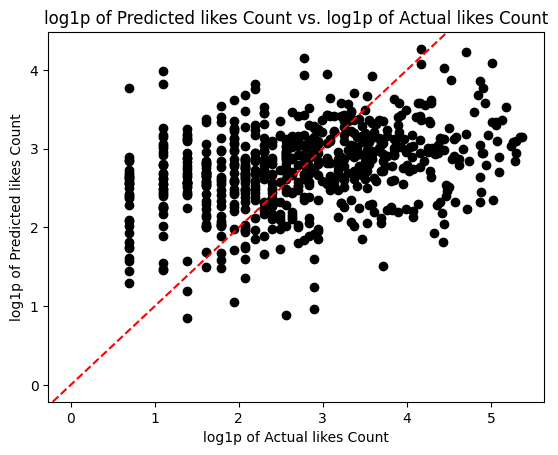

In [ ]:
# Scatter plot (log1p likes) linear regression

plt.scatter(y_test, y_test_pred, color='k')  # Using black dots
plt.xlabel("log1p of Actual likes Count")
plt.ylabel("log1p of Predicted likes Count")
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title("log1p of Predicted likes Count vs. log1p of Actual likes Count")
plt.show()


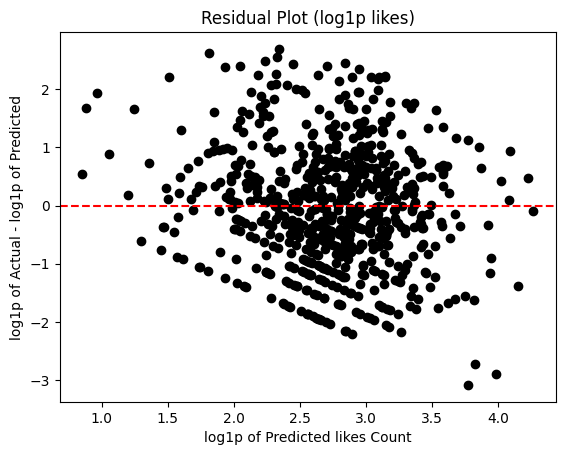

In [ ]:
# Residual plot (log1p likes) linear regression
residuals = y_test.values- y_test_pred
plt.scatter(y_test_pred, residuals, color='k')
plt.xlabel("log1p of Predicted likes Count")
plt.ylabel("log1p of Actual - log1p of Predicted")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (log1p likes)")
plt.show()

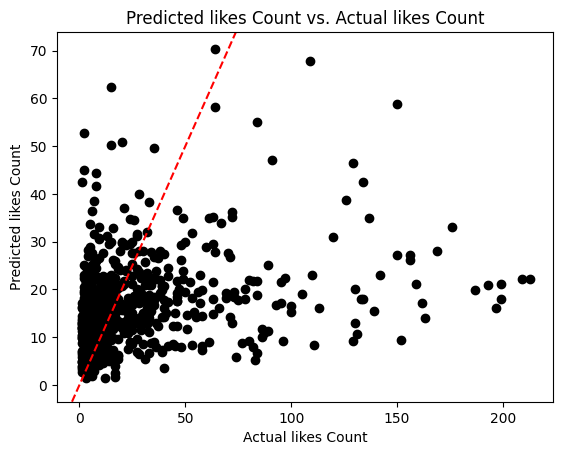

In [ ]:
# Scatter plot linear regression
plt.scatter(y_test_column, y_test_pred_column, color='k')
plt.xlabel("Actual likes Count")
plt.ylabel("Predicted likes Count")
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title("Predicted likes Count vs. Actual likes Count")
plt.show()

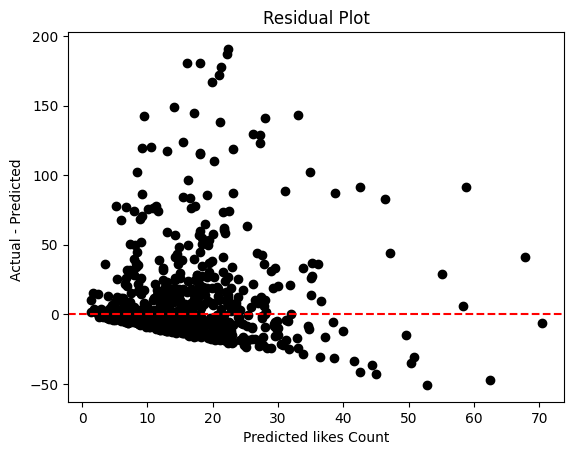

In [ ]:
# Residual plot linear regression
residuals = y_test_column['likes'].to_numpy().ravel() - y_test_pred_column['likes_pred']
plt.scatter(y_test_pred_column['likes_pred'], residuals, color='k')
plt.xlabel("Predicted likes Count")
plt.ylabel("Actual - Predicted ")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

In [ ]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# fig = sm.qqplot(y_test.values- y_test_pred, line='45')
# plt.show()



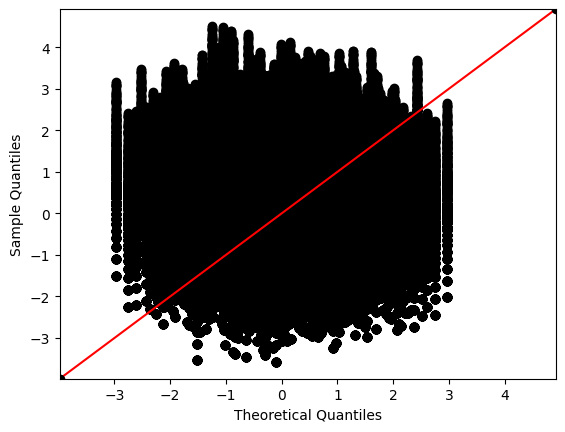

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test.values.ravel() - y_test_pred

# Create the QQ plot
fig = sm.qqplot(residuals, line='45')

# Get the handle to the scatter plot and modify its properties
for line in fig.get_axes()[0].get_lines():
    line.set_marker('o')
    line.set_markerfacecolor('black')
    line.set_markeredgecolor('black')

# Show the plot
plt.show()


In [ ]:
print("The correlation between log1p_likes_pred and log1p_likes is : "+str((np.log1p(test_result_small['likes_pred'])).corr(np.log1p(test_result_small['likes']))))

The correlation between log1p_likes_pred and log1p_likes is : 0.3499464398701735


In [ ]:
print("The correlation between likes_pred and likes is : "+str(test_result_small['likes_pred'].corr(test_result_small['likes'])))

The correlation between likes_pred and likes is : 0.23900920180996368


In [ ]:
# Create an SVR model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
# Create a decision tree regression model
svr = SVR(kernel='rbf', C=1,tol = 1e-12)
start_time = time.time()
svr.fit(X_train, y_train)
print("Training Time is "+str(time.time()-start_time)+" second(s).")
y_train_pred = svr.predict(X_train)
#y_train_pred = np.expm1(y_train_pred)
y_test_pred = svr.predict(X_test)
#y_test_pred = np.expm1(y_test_pred)
print('Train MSE is', mean_squared_error(y_train, y_train_pred))
print('Test MSE is', mean_squared_error(y_test, y_test_pred))
print('Train RMSE is', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE is', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Train R squared is',r2_score(y_train,y_train_pred))
print('Test R squared is',r2_score(y_test,y_test_pred))
print('Train MAE is', mean_absolute_error(y_train, y_train_pred))
print('Test MAE is', mean_absolute_error(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time is 0.1495373249053955 second(s).
Train MSE is 1.016380990732138
Test MSE is 1.1391732562116785
Train RMSE is 1.00815722520455
Test RMSE is 1.0673205967335582
Train R squared is 0.18807053231768378
Test R squared is 0.1121787714301331
Train MAE is 0.7941679823230829
Test MAE is 0.8569166940402756


In [ ]:
#apply expm1 or np.exp(x) - 1 function to recover the intended number of likes number and predictec likes number back from log1p
y_test_pred_column = pd.DataFrame(np.vectorize(lambda x : np.expm1(x))(y_test_pred), columns=["likes_pred"],index=X_test.index)
y_test_column = pd.DataFrame(np.vectorize(lambda x : np.expm1(x))(y_test), columns=["likes"],index=X_test.index)
#y_test_pred_column = pd.DataFrame(y_test_pred, columns=["likes_pred"],index=X_test.index)
#y_test_column = pd.DataFrame(y_test, columns=["likes"],index=X_test.index)
test_result_small = pd.merge(y_test_pred_column, y_test_column, left_index=True, right_index=True, how='left')
test_result_small

,likes_pred,likes
7552,15.346495,15.0
9117,6.967986,5.0
2808,14.145669,22.0
2137,12.503990,15.0
11209,14.786637,14.0
...,...,...
2766,17.037973,6.0
8437,12.576884,65.0
1604,11.163608,91.0
7980,12.093417,10.0


In [ ]:
y_test

,log1p_likes
7552,2.772589
9117,1.791759
2808,3.135494
2137,2.772589
11209,2.708050
...,...
2766,1.945910
8437,4.189655
1604,4.521789
7980,2.397895


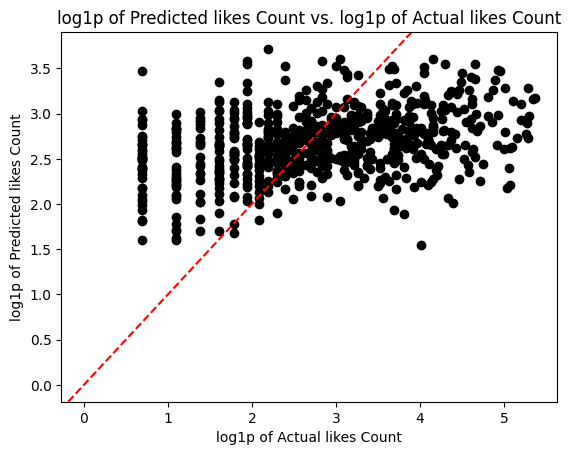

In [ ]:
# Scatter plot (log1p) SVR

plt.scatter(y_test, y_test_pred, color='k')  # Using black dots
plt.xlabel("log1p of Actual likes Count")
plt.ylabel("log1p of Predicted likes Count")
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title("log1p of Predicted likes Count vs. log1p of Actual likes Count")
plt.show()

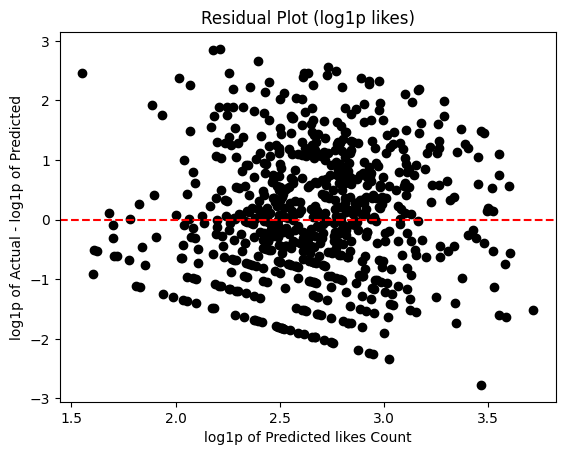

In [ ]:
# Residual plot (log1p likes) SVR

residuals = y_test.values.ravel()- y_test_pred
plt.scatter(y_test_pred, residuals, color='k')
plt.xlabel("log1p of Predicted likes Count")
plt.ylabel("log1p of Actual - log1p of Predicted")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (log1p likes)")
plt.show()

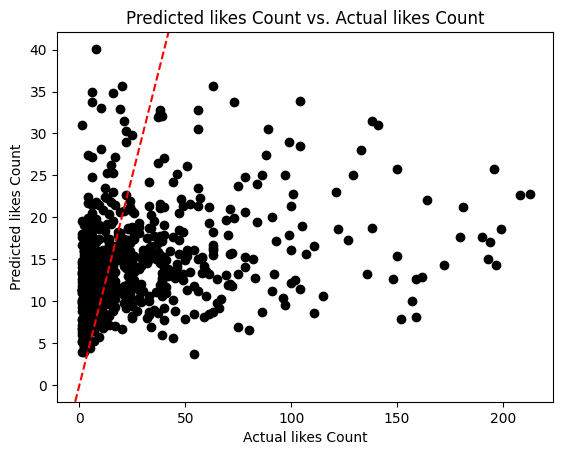

In [ ]:
# Scatter plot SVR
plt.scatter(y_test_column, y_test_pred_column, color='k')
plt.xlabel("Actual likes Count")
plt.ylabel("Predicted likes Count")
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title("Predicted likes Count vs. Actual likes Count")
plt.show()

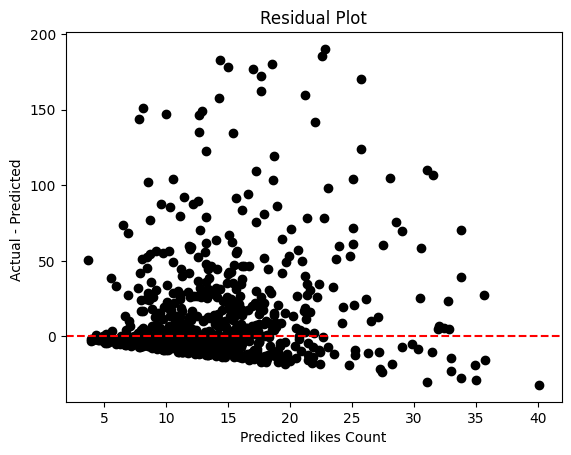

In [ ]:
# Residual plot SVR

residuals = y_test_column['likes'].to_numpy().ravel() - y_test_pred_column['likes_pred']
plt.scatter(y_test_pred_column['likes_pred'], residuals, color='k')
plt.xlabel("Predicted likes Count")
plt.ylabel("Actual - Predicted ")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

In [ ]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# fig = sm.qqplot(y_test.values.ravel()- y_test_pred, line='45')
# plt.show()

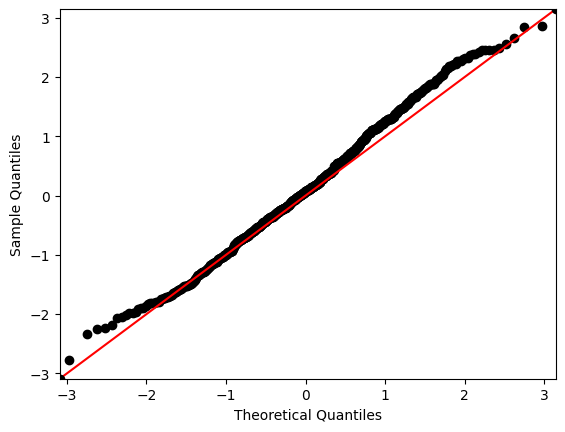

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test.values.ravel() - y_test_pred

# Create the QQ plot
fig = sm.qqplot(residuals, line='45')

# Get the handle to the scatter plot and modify its properties
for line in fig.get_axes()[0].get_lines():
    line.set_marker('o')
    line.set_markerfacecolor('black')
    line.set_markeredgecolor('black')

# Show the plot
plt.show()


In [ ]:
print("The correlation between log1p_likes_pred and log1p_likes is : "+str((np.log1p(test_result_small['likes_pred'])).corr(np.log1p(test_result_small['likes']))))

The correlation between log1p_likes_pred and log1p_likes is : 0.3514456684010465


In [ ]:
print("The correlation between likes_pred and likes is : "+str(test_result_small['likes_pred'].corr(test_result_small['likes'])))

The correlation between likes_pred and likes is : 0.27232407939307346


In [ ]:
#  Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# # n_estimators controls the number of decistion trees to build in the random forest
# # Increasing in n_estimators leads to more robust or overfitting . so I use 10
# rfr = RandomForestRegressor(n_estimators=500,criterion = "absolute_error",n_jobs=-1)
# start_time = time.time()
# rfr.fit(X_train, y_train)
# print("Training Time is "+str(time.time()-start_time)+" second(s).")
# y_train_pred = rfr.predict(X_train)
# #y_train_pred = np.expm1(y_train_pred)

# y_test_pred = rfr.predict(X_test)

# print('Train MSE is', mean_squared_error(y_train, y_train_pred))
# print('Test MSE is', mean_squared_error(y_test, y_test_pred))
# print('Train RMSE is', np.sqrt(mean_squared_error(y_train, y_train_pred)))
# print('Test RMSE is', np.sqrt(mean_squared_error(y_test, y_test_pred)))
# print('Train R squared is',r2_score(y_train,y_train_pred))
# print('Test R squared is',r2_score(y_test,y_test_pred))
# print('Train MAE is', mean_absolute_error(y_train, y_train_pred))
# print('Test MAE is', mean_absolute_error(y_test, y_test_pred))

# Reshape y_train using ravel()
y_train_reshaped = y_train.values.ravel()

# Initialize and fit the RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500, criterion="absolute_error", n_jobs=-1)
start_time = time.time()
rfr.fit(X_train, y_train_reshaped)
print("Training Time is " + str(time.time() - start_time) + " second(s).")

# Make predictions
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Calculate evaluation metrics
print('Train MSE is', mean_squared_error(y_train_reshaped, y_train_pred))
print('Test MSE is', mean_squared_error(y_test, y_test_pred))
print('Train RMSE is', np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)))
print('Test RMSE is', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Train R squared is', r2_score(y_train_reshaped, y_train_pred))
print('Test R squared is', r2_score(y_test, y_test_pred))
print('Train MAE is', mean_absolute_error(y_train_reshaped, y_train_pred))
print('Test MAE is', mean_absolute_error(y_test, y_test_pred))


Training Time is 129.70533514022827 second(s).
Train MSE is 0.11524773652556748
Test MSE is 0.8715704176908294
Train RMSE is 0.3394815702296186
Test RMSE is 0.9335793580038225
Train R squared is 0.9079350812126153
Test R squared is 0.32073658260492144
Train MAE is 0.26350280838586465
Test MAE is 0.7389500504430242


In [ ]:
#apply expm1 or np.exp(x) - 1 function to recover the intended number of likes number and predictec likes number back from log1p
y_test_pred_column = pd.DataFrame(np.vectorize(lambda x : np.expm1(x))(y_test_pred), columns=["likes_pred"],index=X_test.index)
y_test_column = pd.DataFrame(np.vectorize(lambda x : np.expm1(x))(y_test), columns=["likes"],index=X_test.index)
#y_test_pred_column = pd.DataFrame(y_test_pred, columns=["lXikes_pred"],index=X_test.index)
#y_test_column = pd.DataFrame(y_test, columns=["likes"],index=X_test.index)
test_result_small = pd.merge(y_test_pred_column, y_test_column, left_index=True, right_index=True, how='left')
test_result_small

,likes_pred,likes
7552,13.769722,15.0
9117,9.490648,5.0
2808,10.097913,22.0
2137,9.397542,15.0
11209,15.640923,14.0
...,...,...
2766,19.216152,6.0
8437,20.600552,65.0
1604,18.613453,91.0
7980,11.885729,10.0


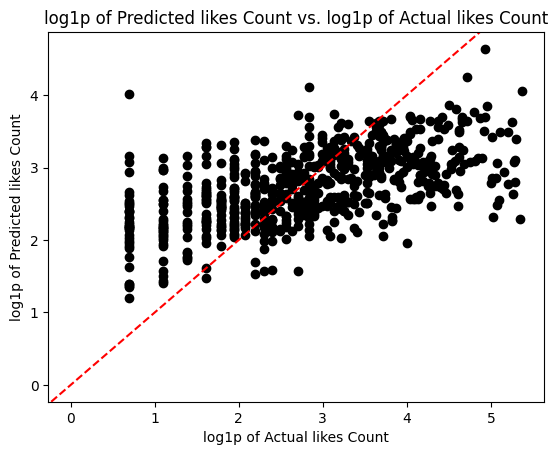

In [ ]:
# Scatter plot (log1p) RFM

plt.scatter(y_test, y_test_pred, color='k')  # Using black dots
plt.xlabel("log1p of Actual likes Count")
plt.ylabel("log1p of Predicted likes Count")
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title("log1p of Predicted likes Count vs. log1p of Actual likes Count")
plt.show()

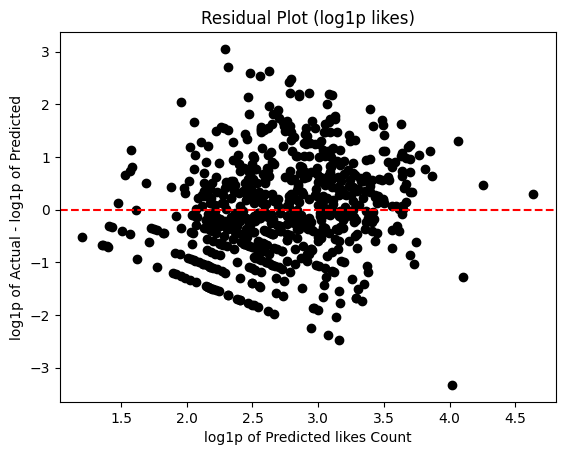

In [ ]:
# Residual plot (log1p likes) RFM

residuals = y_test.values.ravel() - y_test_pred
plt.scatter(y_test_pred, residuals, color='k')
plt.xlabel("log1p of Predicted likes Count")
plt.ylabel("log1p of Actual - log1p of Predicted")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (log1p likes)")
plt.show()

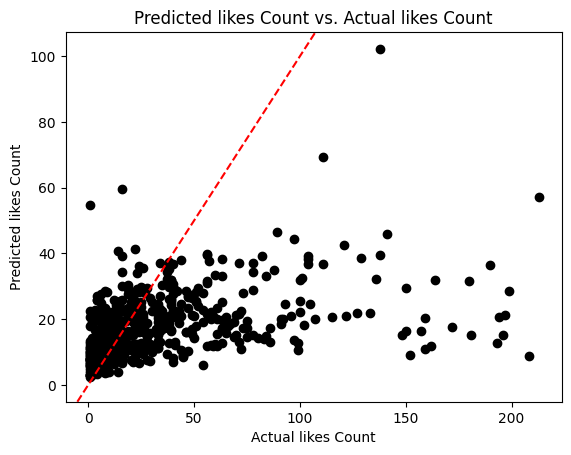

In [ ]:
# Scatter plot RFM
plt.scatter(y_test_column, y_test_pred_column, color='k')
plt.xlabel("Actual likes Count")
plt.ylabel("Predicted likes Count")
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title("Predicted likes Count vs. Actual likes Count")
plt.show()

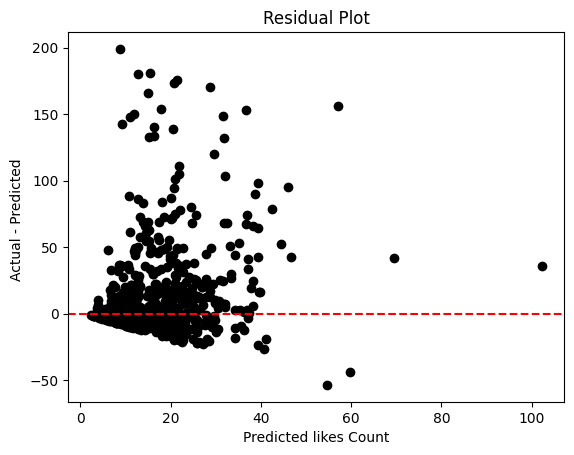

In [ ]:
# Residual plot RFM
residuals = y_test_column['likes'].to_numpy().ravel() - y_test_pred_column['likes_pred']
plt.scatter(y_test_pred_column['likes_pred'], residuals, color='k')
plt.xlabel("Predicted likes Count")
plt.ylabel("Actual - Predicted ")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

In [ ]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# fig = sm.qqplot(y_test.values.ravel()- y_test_pred, line='45')
# plt.show()

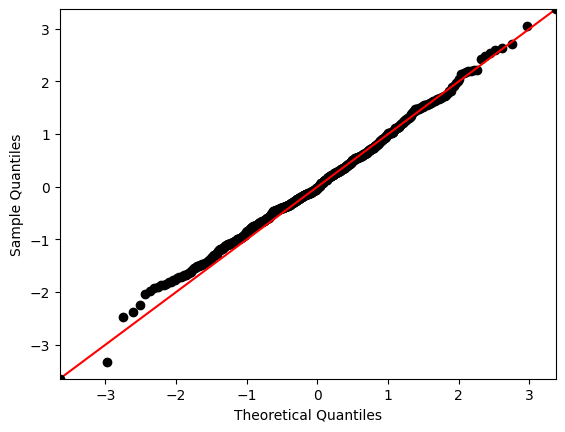

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test.values.ravel() - y_test_pred

# Create the QQ plot
fig = sm.qqplot(residuals, line='45')

# Get the handle to the scatter plot and modify its properties
for line in fig.get_axes()[0].get_lines():
    line.set_marker('o')
    line.set_markerfacecolor('black')
    line.set_markeredgecolor('black')

# Show the plot
plt.show()


In [ ]:
print("The correlation between log1p_likes_pred and log1p_likes is : "+str((np.log1p(test_result_small['likes_pred'])).corr(np.log1p(test_result_small['likes']))))

The correlation between log1p_likes_pred and log1p_likes is : 0.5841816156747229


In [ ]:
print("The correlation between likes_pred and likes is : "+str(test_result_small['likes_pred'].corr(test_result_small['likes'])))

The correlation between likes_pred and likes is : 0.4577967652138867


In [ ]:
#  MLPRegressor
from sklearn.neural_network import MLPRegressor
from math import sqrt
# mlpr = MLPRegressor(hidden_layer_sizes=tuple([100]*1),activation='relu',learning_rate='constant',batch_size=1,learning_rate_init=0.001, tol=1e-12,max_iter=1000000,alpha=0.001)
# start_time = time.time()
# mlpr.fit(X_train, y_train)
# print("Training Time is "+str(time.time()-start_time)+" second(s).")
# y_train_pred = mlpr.predict(X_train)
# #y_train_pred = np.expm1(y_train_pred)

# y_test_pred = mlpr.predict(X_test)
# #y_test_pred = np.expm1(y_test_pred)

# print('Train MSE is', mean_squared_error(y_train, y_train_pred))
# print('Test MSE is', mean_squared_error(y_test, y_test_pred))
# print('Train RMSE is', np.sqrt(mean_squared_error(y_train, y_train_pred)))
# print('Test RMSE is', np.sqrt(mean_squared_error(y_test, y_test_pred)))
# print('Train R squared is',r2_score(y_train,y_train_pred))
# print('Test R squared is',r2_score(y_test,y_test_pred))
# print('Train MAE is', mean_absolute_error(y_train, y_train_pred))
# print('Test MAE is', mean_absolute_error(y_test, y_test_pred))

# Reshape y_train using ravel()
y_train_reshaped = y_train.values.ravel()

# Initialize and fit the MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=tuple([100]*1), activation='relu', learning_rate='constant',
                    batch_size=1, learning_rate_init=0.001, tol=1e-12, max_iter=1000000, alpha=0.001)
start_time = time.time()
mlpr.fit(X_train, y_train_reshaped)
print("Training Time is " + str(time.time() - start_time) + " second(s).")

# Make predictions
y_train_pred = mlpr.predict(X_train)
y_test_pred = mlpr.predict(X_test)

# Calculate evaluation metrics
print('Train MSE is', mean_squared_error(y_train_reshaped, y_train_pred))
print('Test MSE is', mean_squared_error(y_test, y_test_pred))
print('Train RMSE is', np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)))
print('Test RMSE is', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Train R squared is', r2_score(y_train_reshaped, y_train_pred))
print('Test R squared is', r2_score(y_test, y_test_pred))
print('Train MAE is', mean_absolute_error(y_train_reshaped, y_train_pred))
print('Test MAE is', mean_absolute_error(y_test, y_test_pred))


Training Time is 65.69557070732117 second(s).
Train MSE is 0.5889474435136687
Test MSE is 1.1324073595847863
Train RMSE is 0.7674291130219577
Test RMSE is 1.0641463055354683
Train R squared is 0.5295230935395003
Test R squared is 0.11745181187671117
Train MAE is 0.6030592890252885
Test MAE is 0.8406680702097444


In [ ]:
#apply expm1 or np.exp(x) - 1 function to recover the intended number of likes number and predictec likes number back from log1p
y_test_pred_column = pd.DataFrame(np.vectorize(lambda x : np.expm1(x))(y_test_pred), columns=["likes_pred"],index=X_test.index)
y_test_column = pd.DataFrame(np.vectorize(lambda x : np.expm1(x))(y_test), columns=["likes"],index=X_test.index)
#y_test_pred_column = pd.DataFrame(y_test_pred, columns=["likes_pred"],index=X_test.index)
#y_test_column = pd.DataFrame(y_test, columns=["likes"],index=X_test.index)
test_result_small = pd.merge(y_test_pred_column, y_test_column, left_index=True, right_index=True, how='left')
test_result_small

,likes_pred,likes
7552,1.339249,15.0
9117,11.258906,5.0
2808,10.193048,22.0
2137,19.301211,15.0
11209,24.465815,14.0
...,...,...
2766,18.210816,6.0
8437,15.604770,65.0
1604,20.719748,91.0
7980,13.234601,10.0


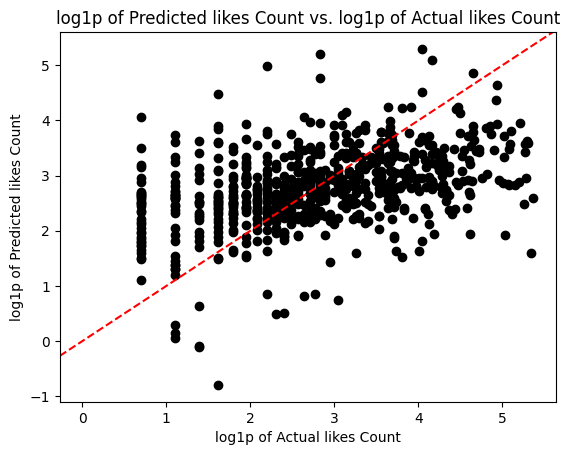

In [ ]:
# Scatter plot (log1p)
plt.scatter(y_test, y_test_pred, color='k')  # Using black dots
plt.xlabel("log1p of Actual likes Count")
plt.ylabel("log1p of Predicted likes Count")
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title("log1p of Predicted likes Count vs. log1p of Actual likes Count")
plt.show()


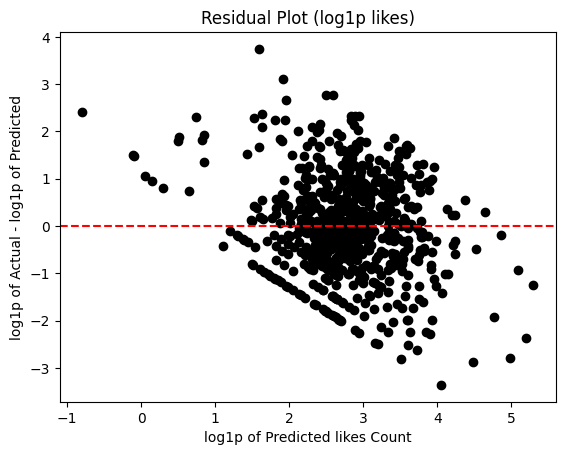

In [ ]:
# Residual plot (log1p likes)

residuals = y_test.values.ravel()- y_test_pred
plt.scatter(y_test_pred, residuals, color='k')
plt.xlabel("log1p of Predicted likes Count")
plt.ylabel("log1p of Actual - log1p of Predicted")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (log1p likes)")
plt.show()

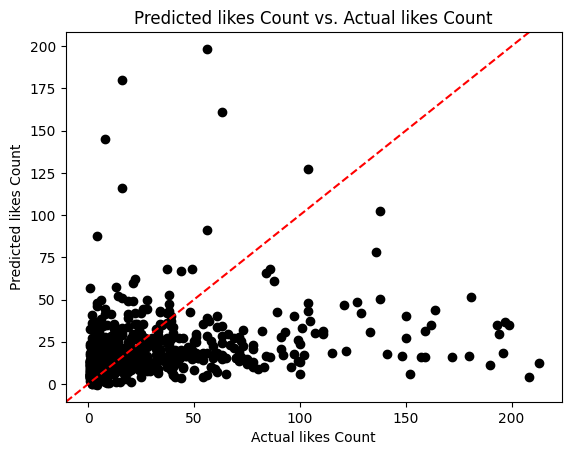

In [ ]:
# Scatter plot
plt.scatter(y_test_column, y_test_pred_column, color='k')
plt.xlabel("Actual likes Count")
plt.ylabel("Predicted likes Count")
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title("Predicted likes Count vs. Actual likes Count")
plt.show()

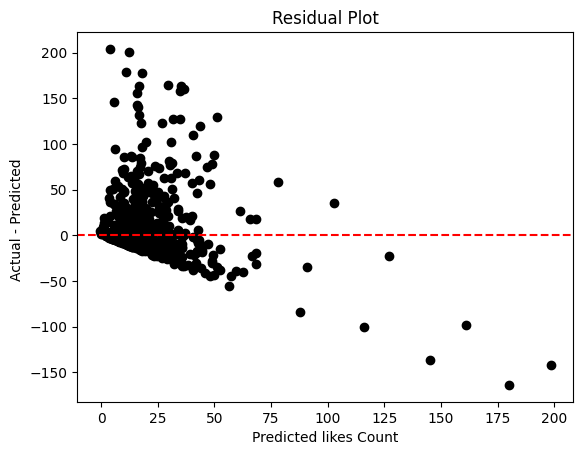

In [ ]:
# Residual plot
residuals = y_test_column['likes'].to_numpy().ravel() - y_test_pred_column['likes_pred']
plt.scatter(y_test_pred_column['likes_pred'], residuals, color='k')
plt.xlabel("Predicted likes Count")
plt.ylabel("Actual - Predicted ")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

In [ ]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# fig = sm.qqplot(y_test.values.ravel()- y_test_pred, line='45')
# plt.show()

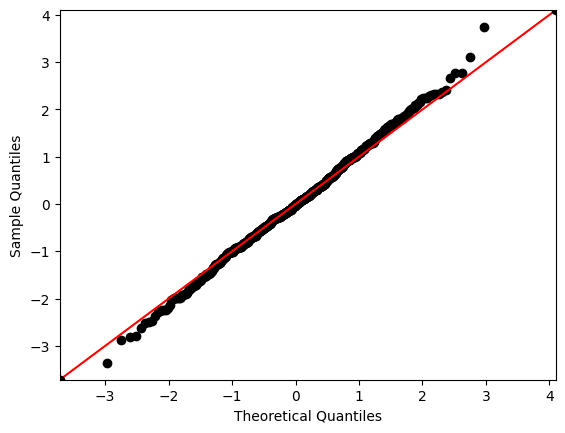

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test.values.ravel() - y_test_pred

# Create the QQ plot
fig = sm.qqplot(residuals, line='45')

# Get the handle to the scatter plot and modify its properties
for line in fig.get_axes()[0].get_lines():
    line.set_marker('o')
    line.set_markerfacecolor('black')
    line.set_markeredgecolor('black')

# Show the plot
plt.show()


In [ ]:
print("The correlation between log1p_likes_pred and log1p_likes is : "+str((np.log1p(test_result_small['likes_pred'])).corr(np.log1p(test_result_small['likes']))))

The correlation between log1p_likes_pred and log1p_likes is : 0.4097989134538261


In [ ]:
print("The correlation between likes_pred and likes is : "+str(test_result_small['likes_pred'].corr(test_result_small['likes'])))

The correlation between likes_pred and likes is : 0.25745729999643124
